In [1]:
import importlib
import itertools
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

np.random.seed(33333)
torch.manual_seed(33333)
%matplotlib inline

In [2]:
import razor_data
import toy_data
import plotting
import gp
importlib.reload(razor_data);
importlib.reload(toy_data);
importlib.reload(plotting);

In [3]:
def get_data(box, btags, num_mr_bins, mr_max):
    binned_data = razor_data.get_binned_data_1d(
            num_mr_bins=num_mr_bins, mr_max=mr_max)
    test_data = binned_data[box][btags]
    return test_data

def fit_and_plot(box, btags, num_mr_bins, mr_max, kernel, 
                 steps=25, lr_g=0.0001, lr_k=0.01):
    data = get_data(box, btags , num_mr_bins, mr_max)
    U = data['u']
    Y = data['y']
    G = gp.PoissonLikelihoodGP(kernel, U, Y)
    G.fit(num_steps=steps, lr_g=lr_g, lr_k=lr_k)
    plotting.plot_hist_1d(data, G=G, use_noise=True)
    plotting.plot_nsigma_1d(data, G)
    return G

0 199.81 200.01 -12451.3
100 199.81 200.01 -13085.1
200 199.81 200.01 -14210.3
300 199.81 200.01 -14291.6
400 199.81 200.01 -14292.5
500 199.81 200.01 -14292.6
600 199.81 200.01 -14292.7
700 199.81 200.01 -14292.7
800 199.81 200.01 -14292.8
900 199.81 200.01 -14292.8
Best-fit kernel parameters:  199.81 200.01


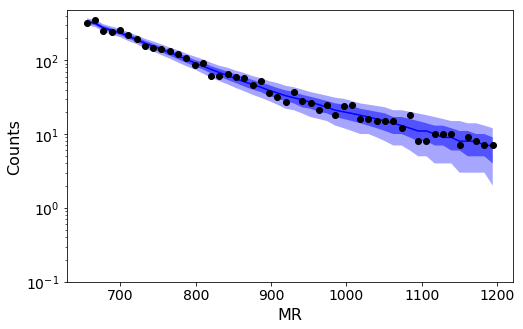

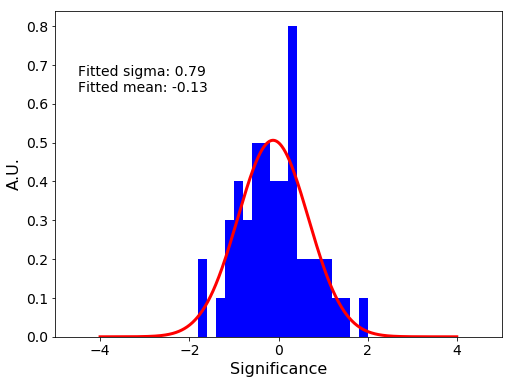

In [4]:
kernel = gp.SquaredExponentialKernel(200, 200)
G = fit_and_plot('MultiJet', 1, 50, 1200, kernel, 
                 steps=1000, lr_g=0.001, lr_k=0.001)

Note that the uncertainties here are just from the Poisson uncertainty on the observed data and do not include uncertainty on the underlying fit function.  Still need to implement that.

0 99.58 19.43 334706.0
100 99.58 19.43 799.665
200 99.58 19.43 -12.095
300 99.58 19.43 -23.4118
400 99.58 19.43 -23.5659
500 99.58 19.43 -23.5676
600 99.58 19.43 -23.568
700 99.58 19.43 -23.5681
800 99.58 19.43 -23.5682
900 99.58 19.43 -23.5683
Best-fit kernel parameters:  99.58 19.43


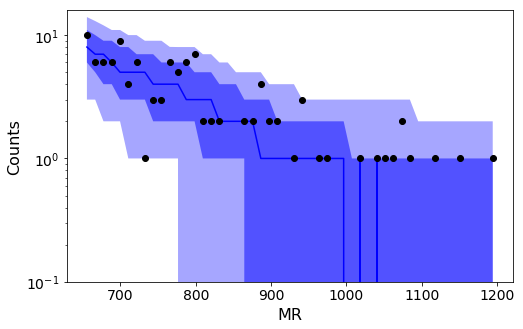

Error: at least one nsigma is infinite


In [7]:
kernel = gp.SquaredExponentialKernel(100, 20)
G = fit_and_plot('SevenJet', 3, 50, 1200, kernel, 
                 steps=1000, lr_g=0.001, lr_k=0.1)

0 1999.98 0.01 199.98 -14215.1
100 1999.98 0.01 199.98 -14276.4
200 1999.98 0.01 199.98 -14276.5
300 1999.98 0.01 199.98 -14283.4
400 1999.98 0.01 199.98 -14299.9
500 1999.98 0.01 199.98 -14300.2
600 1999.98 0.01 199.98 -14300.2
700 1999.98 0.01 199.98 -14300.3
800 1999.98 0.01 199.98 -14300.3
900 1999.98 0.01 199.98 -14300.3
Best-fit kernel parameters:  1999.98 0.01 199.98


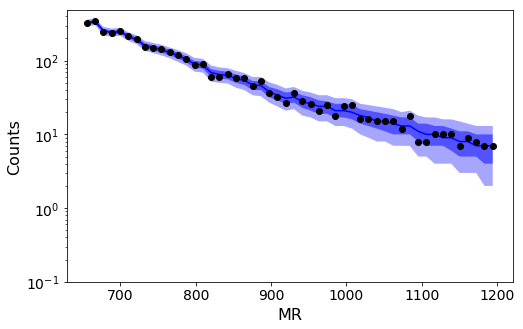

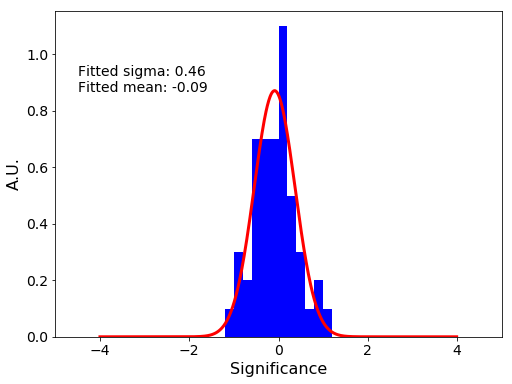

In [7]:
kernel = gp.LinearGibbsKernel(2000, 0.01, 200)
G = fit_and_plot('MultiJet', 1, 50, 1200, kernel, 
                 steps=1000, lr_g=0.001, lr_k=0.0001)

Variable containing:
 14309.9629
[torch.FloatTensor of size 1]
 Variable containing:
-507.4416
[torch.FloatTensor of size 1]

Variable containing:
 14309.9629
[torch.FloatTensor of size 1]
 Variable containing:
-507.4416
[torch.FloatTensor of size 1]

Variable containing:
 13920.6191
[torch.FloatTensor of size 1]
 Variable containing:
-507.4416
[torch.FloatTensor of size 1]

Variable containing:
 12958.7256
[torch.FloatTensor of size 1]
 Variable containing:
-507.4416
[torch.FloatTensor of size 1]

Variable containing:
 12958.7256
[torch.FloatTensor of size 1]
 Variable containing:
-507.4416
[torch.FloatTensor of size 1]

Variable containing:
 12958.7256
[torch.FloatTensor of size 1]
 Variable containing:
-507.4416
[torch.FloatTensor of size 1]

Variable containing:
 12958.7256
[torch.FloatTensor of size 1]
 Variable containing:
-507.4416
[torch.FloatTensor of size 1]

Variable containing:
 12967.5898
[torch.FloatTensor of size 1]
 Variable containing:
-507.4413
[torch.FloatTensor of s

 Variable containing:
-507.2400
[torch.FloatTensor of size 1]

Variable containing:
 14282.2881
[torch.FloatTensor of size 1]
 Variable containing:
-507.2401
[torch.FloatTensor of size 1]

Variable containing:
 14282.3496
[torch.FloatTensor of size 1]
 Variable containing:
-507.2401
[torch.FloatTensor of size 1]

Variable containing:
 14282.4102
[torch.FloatTensor of size 1]
 Variable containing:
-507.2401
[torch.FloatTensor of size 1]

Variable containing:
 14282.4707
[torch.FloatTensor of size 1]
 Variable containing:
-507.2401
[torch.FloatTensor of size 1]

Variable containing:
 14282.5312
[torch.FloatTensor of size 1]
 Variable containing:
-507.2401
[torch.FloatTensor of size 1]

Variable containing:
 14282.5928
[torch.FloatTensor of size 1]
 Variable containing:
-507.2401
[torch.FloatTensor of size 1]

Variable containing:
 14282.6533
[torch.FloatTensor of size 1]
 Variable containing:
-507.2401
[torch.FloatTensor of size 1]

Variable containing:
 14282.6533
[torch.FloatTensor of 

Variable containing:
 14286.2881
[torch.FloatTensor of size 1]
 Variable containing:
-507.2403
[torch.FloatTensor of size 1]

Variable containing:
 14286.3408
[torch.FloatTensor of size 1]
 Variable containing:
-507.2403
[torch.FloatTensor of size 1]

Variable containing:
 14286.3936
[torch.FloatTensor of size 1]
 Variable containing:
-507.2403
[torch.FloatTensor of size 1]

Variable containing:
 14286.4463
[torch.FloatTensor of size 1]
 Variable containing:
-507.2403
[torch.FloatTensor of size 1]

Variable containing:
 14286.4990
[torch.FloatTensor of size 1]
 Variable containing:
-507.2403
[torch.FloatTensor of size 1]

Variable containing:
 14286.5518
[torch.FloatTensor of size 1]
 Variable containing:
-507.2403
[torch.FloatTensor of size 1]

Variable containing:
 14286.6045
[torch.FloatTensor of size 1]
 Variable containing:
-507.2403
[torch.FloatTensor of size 1]

Variable containing:
 14286.6562
[torch.FloatTensor of size 1]
 Variable containing:
-507.2403
[torch.FloatTensor of s

Variable containing:
 14290
[torch.FloatTensor of size 1]
 Variable containing:
-507.2405
[torch.FloatTensor of size 1]

Variable containing:
 14290
[torch.FloatTensor of size 1]
 Variable containing:
-507.2405
[torch.FloatTensor of size 1]

Variable containing:
 14290
[torch.FloatTensor of size 1]
 Variable containing:
-507.2405
[torch.FloatTensor of size 1]

Variable containing:
 14290.0449
[torch.FloatTensor of size 1]
 Variable containing:
-507.2405
[torch.FloatTensor of size 1]

Variable containing:
 14290.0898
[torch.FloatTensor of size 1]
 Variable containing:
-507.2405
[torch.FloatTensor of size 1]

Variable containing:
 14290.1338
[torch.FloatTensor of size 1]
 Variable containing:
-507.2405
[torch.FloatTensor of size 1]

Variable containing:
 14290.1777
[torch.FloatTensor of size 1]
 Variable containing:
-507.2405
[torch.FloatTensor of size 1]

Variable containing:
 14290.2217
[torch.FloatTensor of size 1]
 Variable containing:
-507.2405
[torch.FloatTensor of size 1]

Variabl

Variable containing:
 12977.4961
[torch.FloatTensor of size 1]
 Variable containing:
-507.2181
[torch.FloatTensor of size 1]

Variable containing:
 12977.8477
[torch.FloatTensor of size 1]
 Variable containing:
-507.2157
[torch.FloatTensor of size 1]

Variable containing:
 12978.2119
[torch.FloatTensor of size 1]
 Variable containing:
-507.2132
[torch.FloatTensor of size 1]

Variable containing:
 12978.5869
[torch.FloatTensor of size 1]
 Variable containing:
-507.2105
[torch.FloatTensor of size 1]

Variable containing:
 12978.9746
[torch.FloatTensor of size 1]
 Variable containing:
-507.2077
[torch.FloatTensor of size 1]

Variable containing:
 12979.3730
[torch.FloatTensor of size 1]
 Variable containing:
-507.2047
[torch.FloatTensor of size 1]

Variable containing:
 12979.7842
[torch.FloatTensor of size 1]
 Variable containing:
-507.2015
[torch.FloatTensor of size 1]

Variable containing:
 12980.2080
[torch.FloatTensor of size 1]
 Variable containing:
-507.1982
[torch.FloatTensor of s

Variable containing:
 13022.1934
[torch.FloatTensor of size 1]
 Variable containing:
-506.5048
[torch.FloatTensor of size 1]

Variable containing:
 13023.0811
[torch.FloatTensor of size 1]
 Variable containing:
-506.4818
[torch.FloatTensor of size 1]

Variable containing:
 13023.9746
[torch.FloatTensor of size 1]
 Variable containing:
-506.4584
[torch.FloatTensor of size 1]

Variable containing:
 13024.8740
[torch.FloatTensor of size 1]
 Variable containing:
-506.4344
[torch.FloatTensor of size 1]

Variable containing:
 13025.7773
[torch.FloatTensor of size 1]
 Variable containing:
-506.4100
[torch.FloatTensor of size 1]

Variable containing:
 13026.6895
[torch.FloatTensor of size 1]
 Variable containing:
-506.3850
[torch.FloatTensor of size 1]

Variable containing:
 13027.6045
[torch.FloatTensor of size 1]
 Variable containing:
-506.3596
[torch.FloatTensor of size 1]

Variable containing:
 13027.6045
[torch.FloatTensor of size 1]
 Variable containing:
-506.3596
[torch.FloatTensor of s

 Variable containing:
-470.4310
[torch.FloatTensor of size 1]

Variable containing:
-2.8020e+09
[torch.FloatTensor of size 1]
 Variable containing:
-471.0053
[torch.FloatTensor of size 1]

Variable containing:
-2.2722e+09
[torch.FloatTensor of size 1]
 Variable containing:
-471.5765
[torch.FloatTensor of size 1]

Variable containing:
-1.8483e+09
[torch.FloatTensor of size 1]
 Variable containing:
-472.1435
[torch.FloatTensor of size 1]

Variable containing:
-1.5086e+09
[torch.FloatTensor of size 1]
 Variable containing:
-472.7053
[torch.FloatTensor of size 1]

Variable containing:
-1.2358e+09
[torch.FloatTensor of size 1]
 Variable containing:
-473.2610
[torch.FloatTensor of size 1]

Variable containing:
-1.0162e+09
[torch.FloatTensor of size 1]
 Variable containing:
-473.8095
[torch.FloatTensor of size 1]

Variable containing:
-8.3893e+08
[torch.FloatTensor of size 1]
 Variable containing:
-474.3502
[torch.FloatTensor of size 1]

Variable containing:
-6.9544e+08
[torch.FloatTensor of 

Variable containing:
 13106.5068
[torch.FloatTensor of size 1]
 Variable containing:
-505.2710
[torch.FloatTensor of size 1]

Variable containing:
 13112.1914
[torch.FloatTensor of size 1]
 Variable containing:
-505.2824
[torch.FloatTensor of size 1]

Variable containing:
 13117.6699
[torch.FloatTensor of size 1]
 Variable containing:
-505.2935
[torch.FloatTensor of size 1]

Variable containing:
 13122.9580
[torch.FloatTensor of size 1]
 Variable containing:
-505.3044
[torch.FloatTensor of size 1]

Variable containing:
 13128.0703
[torch.FloatTensor of size 1]
 Variable containing:
-505.3151
[torch.FloatTensor of size 1]

Variable containing:
 13133.0205
[torch.FloatTensor of size 1]
 Variable containing:
-505.3255
[torch.FloatTensor of size 1]

Variable containing:
 13137.8252
[torch.FloatTensor of size 1]
 Variable containing:
-505.3357
[torch.FloatTensor of size 1]

Variable containing:
 13142.4932
[torch.FloatTensor of size 1]
 Variable containing:
-505.3457
[torch.FloatTensor of s

 Variable containing:
-505.8890
[torch.FloatTensor of size 1]

Variable containing:
 13351.1865
[torch.FloatTensor of size 1]
 Variable containing:
-505.8951
[torch.FloatTensor of size 1]

Variable containing:
 13353.1953
[torch.FloatTensor of size 1]
 Variable containing:
-505.9013
[torch.FloatTensor of size 1]

Variable containing:
 13355.2207
[torch.FloatTensor of size 1]
 Variable containing:
-505.9074
[torch.FloatTensor of size 1]

Variable containing:
 13357.2812
[torch.FloatTensor of size 1]
 Variable containing:
-505.9136
[torch.FloatTensor of size 1]

Variable containing:
 13359.3994
[torch.FloatTensor of size 1]
 Variable containing:
-505.9198
[torch.FloatTensor of size 1]

Variable containing:
 13361.5957
[torch.FloatTensor of size 1]
 Variable containing:
-505.9262
[torch.FloatTensor of size 1]

Variable containing:
 13363.8936
[torch.FloatTensor of size 1]
 Variable containing:
-505.9327
[torch.FloatTensor of size 1]

Variable containing:
 13366.3115
[torch.FloatTensor of 

Variable containing:
 13944.0254
[torch.FloatTensor of size 1]
 Variable containing:
-508.2371
[torch.FloatTensor of size 1]

Variable containing:
 13948.7188
[torch.FloatTensor of size 1]
 Variable containing:
-508.2657
[torch.FloatTensor of size 1]

Variable containing:
 13953.2910
[torch.FloatTensor of size 1]
 Variable containing:
-508.2938
[torch.FloatTensor of size 1]

Variable containing:
 13957.7461
[torch.FloatTensor of size 1]
 Variable containing:
-508.3214
[torch.FloatTensor of size 1]

Variable containing:
 13962.0918
[torch.FloatTensor of size 1]
 Variable containing:
-508.3484
[torch.FloatTensor of size 1]

Variable containing:
 13966.3291
[torch.FloatTensor of size 1]
 Variable containing:
-508.3750
[torch.FloatTensor of size 1]

Variable containing:
 13966.3291
[torch.FloatTensor of size 1]
 Variable containing:
-508.3750
[torch.FloatTensor of size 1]

Variable containing:
 13966.3291
[torch.FloatTensor of size 1]
 Variable containing:
-508.3750
[torch.FloatTensor of s

Variable containing:
 14159.7578
[torch.FloatTensor of size 1]
 Variable containing:
-509.7859
[torch.FloatTensor of size 1]

Variable containing:
 14161.0547
[torch.FloatTensor of size 1]
 Variable containing:
-509.7978
[torch.FloatTensor of size 1]

Variable containing:
 14162.3438
[torch.FloatTensor of size 1]
 Variable containing:
-509.8097
[torch.FloatTensor of size 1]

Variable containing:
 14163.6250
[torch.FloatTensor of size 1]
 Variable containing:
-509.8217
[torch.FloatTensor of size 1]

Variable containing:
 14164.8984
[torch.FloatTensor of size 1]
 Variable containing:
-509.8336
[torch.FloatTensor of size 1]

Variable containing:
 14166.1621
[torch.FloatTensor of size 1]
 Variable containing:
-509.8456
[torch.FloatTensor of size 1]

Variable containing:
 14167.4189
[torch.FloatTensor of size 1]
 Variable containing:
-509.8575
[torch.FloatTensor of size 1]

Variable containing:
 14168.6680
[torch.FloatTensor of size 1]
 Variable containing:
-509.8695
[torch.FloatTensor of s

Variable containing:
 10328.1250
[torch.FloatTensor of size 1]
 Variable containing:
-522.7436
[torch.FloatTensor of size 1]

Variable containing:
 10332.7383
[torch.FloatTensor of size 1]
 Variable containing:
-522.7397
[torch.FloatTensor of size 1]

Variable containing:
 10337.3496
[torch.FloatTensor of size 1]
 Variable containing:
-522.7359
[torch.FloatTensor of size 1]

Variable containing:
 10337.3496
[torch.FloatTensor of size 1]
 Variable containing:
-522.7359
[torch.FloatTensor of size 1]

Variable containing:
 10337.3496
[torch.FloatTensor of size 1]
 Variable containing:
-522.7359
[torch.FloatTensor of size 1]

Variable containing:
 10337.3496
[torch.FloatTensor of size 1]
 Variable containing:
-522.7359
[torch.FloatTensor of size 1]

Variable containing:
 10337.3496
[torch.FloatTensor of size 1]
 Variable containing:
-522.7359
[torch.FloatTensor of size 1]

Variable containing:
 10341.9580
[torch.FloatTensor of size 1]
 Variable containing:
-522.7321
[torch.FloatTensor of s

 Variable containing:
-522.4357
[torch.FloatTensor of size 1]

Variable containing:
 10689.1406
[torch.FloatTensor of size 1]
 Variable containing:
-522.4318
[torch.FloatTensor of size 1]

Variable containing:
 10693.4355
[torch.FloatTensor of size 1]
 Variable containing:
-522.4279
[torch.FloatTensor of size 1]

Variable containing:
 10693.4355
[torch.FloatTensor of size 1]
 Variable containing:
-522.4279
[torch.FloatTensor of size 1]

Variable containing:
 10693.4355
[torch.FloatTensor of size 1]
 Variable containing:
-522.4279
[torch.FloatTensor of size 1]

Variable containing:
 10693.4355
[torch.FloatTensor of size 1]
 Variable containing:
-522.4279
[torch.FloatTensor of size 1]

Variable containing:
 10693.4355
[torch.FloatTensor of size 1]
 Variable containing:
-522.4279
[torch.FloatTensor of size 1]

Variable containing:
 10697.7314
[torch.FloatTensor of size 1]
 Variable containing:
-522.4240
[torch.FloatTensor of size 1]

Variable containing:
 10702.0234
[torch.FloatTensor of 

Variable containing:
 10944.4727
[torch.FloatTensor of size 1]
 Variable containing:
-522.1935
[torch.FloatTensor of size 1]

Variable containing:
 10944.4727
[torch.FloatTensor of size 1]
 Variable containing:
-522.1935
[torch.FloatTensor of size 1]

Variable containing:
 10948.5459
[torch.FloatTensor of size 1]
 Variable containing:
-522.1896
[torch.FloatTensor of size 1]

Variable containing:
 10952.6152
[torch.FloatTensor of size 1]
 Variable containing:
-522.1857
[torch.FloatTensor of size 1]

Variable containing:
 10956.6797
[torch.FloatTensor of size 1]
 Variable containing:
-522.1818
[torch.FloatTensor of size 1]

Variable containing:
 10960.7412
[torch.FloatTensor of size 1]
 Variable containing:
-522.1779
[torch.FloatTensor of size 1]

Variable containing:
 10964.7979
[torch.FloatTensor of size 1]
 Variable containing:
-522.1739
[torch.FloatTensor of size 1]

Variable containing:
 10968.8506
[torch.FloatTensor of size 1]
 Variable containing:
-522.1700
[torch.FloatTensor of s

Variable containing:
 11259.0039
[torch.FloatTensor of size 1]
 Variable containing:
-521.8772
[torch.FloatTensor of size 1]

Variable containing:
 11259.0039
[torch.FloatTensor of size 1]
 Variable containing:
-521.8772
[torch.FloatTensor of size 1]

Variable containing:
 11259.0039
[torch.FloatTensor of size 1]
 Variable containing:
-521.8772
[torch.FloatTensor of size 1]

Variable containing:
 11259.0039
[torch.FloatTensor of size 1]
 Variable containing:
-521.8772
[torch.FloatTensor of size 1]

Variable containing:
 11259.0039
[torch.FloatTensor of size 1]
 Variable containing:
-521.8772
[torch.FloatTensor of size 1]

Variable containing:
 11262.7959
[torch.FloatTensor of size 1]
 Variable containing:
-521.8732
[torch.FloatTensor of size 1]

Variable containing:
 11266.5820
[torch.FloatTensor of size 1]
 Variable containing:
-521.8692
[torch.FloatTensor of size 1]

Variable containing:
 11270.3672
[torch.FloatTensor of size 1]
 Variable containing:
-521.8652
[torch.FloatTensor of s

Variable containing:
 11544.7031
[torch.FloatTensor of size 1]
 Variable containing:
-521.5637
[torch.FloatTensor of size 1]

Variable containing:
 11548.2354
[torch.FloatTensor of size 1]
 Variable containing:
-521.5596
[torch.FloatTensor of size 1]

Variable containing:
 11551.7646
[torch.FloatTensor of size 1]
 Variable containing:
-521.5556
[torch.FloatTensor of size 1]

Variable containing:
 11551.7646
[torch.FloatTensor of size 1]
 Variable containing:
-521.5556
[torch.FloatTensor of size 1]

Variable containing:
 11551.7646
[torch.FloatTensor of size 1]
 Variable containing:
-521.5556
[torch.FloatTensor of size 1]

Variable containing:
 11551.7646
[torch.FloatTensor of size 1]
 Variable containing:
-521.5556
[torch.FloatTensor of size 1]

Variable containing:
 11551.7646
[torch.FloatTensor of size 1]
 Variable containing:
-521.5556
[torch.FloatTensor of size 1]

Variable containing:
 11555.2930
[torch.FloatTensor of size 1]
 Variable containing:
-521.5515
[torch.FloatTensor of s

Variable containing:
 11787.8164
[torch.FloatTensor of size 1]
 Variable containing:
-521.2730
[torch.FloatTensor of size 1]

Variable containing:
 11791.1299
[torch.FloatTensor of size 1]
 Variable containing:
-521.2689
[torch.FloatTensor of size 1]

Variable containing:
 11794.4414
[torch.FloatTensor of size 1]
 Variable containing:
-521.2647
[torch.FloatTensor of size 1]

Variable containing:
 11797.7480
[torch.FloatTensor of size 1]
 Variable containing:
-521.2606
[torch.FloatTensor of size 1]

Variable containing:
 11801.0508
[torch.FloatTensor of size 1]
 Variable containing:
-521.2565
[torch.FloatTensor of size 1]

Variable containing:
 11804.3506
[torch.FloatTensor of size 1]
 Variable containing:
-521.2524
[torch.FloatTensor of size 1]

Variable containing:
 11807.6504
[torch.FloatTensor of size 1]
 Variable containing:
-521.2482
[torch.FloatTensor of size 1]

Variable containing:
 11810.9463
[torch.FloatTensor of size 1]
 Variable containing:
-521.2441
[torch.FloatTensor of s

Variable containing:
 11997.0020
[torch.FloatTensor of size 1]
 Variable containing:
-521.0021
[torch.FloatTensor of size 1]

Variable containing:
 12000.1221
[torch.FloatTensor of size 1]
 Variable containing:
-520.9978
[torch.FloatTensor of size 1]

Variable containing:
 12003.2432
[torch.FloatTensor of size 1]
 Variable containing:
-520.9936
[torch.FloatTensor of size 1]

Variable containing:
 12006.3604
[torch.FloatTensor of size 1]
 Variable containing:
-520.9894
[torch.FloatTensor of size 1]

Variable containing:
 12009.4727
[torch.FloatTensor of size 1]
 Variable containing:
-520.9852
[torch.FloatTensor of size 1]

Variable containing:
 12012.5830
[torch.FloatTensor of size 1]
 Variable containing:
-520.9810
[torch.FloatTensor of size 1]

Variable containing:
 12015.6904
[torch.FloatTensor of size 1]
 Variable containing:
-520.9767
[torch.FloatTensor of size 1]

Variable containing:
 12015.6904
[torch.FloatTensor of size 1]
 Variable containing:
-520.9767
[torch.FloatTensor of s

Variable containing:
 12197.0039
[torch.FloatTensor of size 1]
 Variable containing:
-520.7213
[torch.FloatTensor of size 1]

Variable containing:
 12197.0039
[torch.FloatTensor of size 1]
 Variable containing:
-520.7213
[torch.FloatTensor of size 1]

Variable containing:
 12197.0039
[torch.FloatTensor of size 1]
 Variable containing:
-520.7213
[torch.FloatTensor of size 1]

Variable containing:
 12197.0039
[torch.FloatTensor of size 1]
 Variable containing:
-520.7213
[torch.FloatTensor of size 1]

Variable containing:
 12197.0039
[torch.FloatTensor of size 1]
 Variable containing:
-520.7213
[torch.FloatTensor of size 1]

Variable containing:
 12199.9414
[torch.FloatTensor of size 1]
 Variable containing:
-520.7170
[torch.FloatTensor of size 1]

Variable containing:
 12202.8770
[torch.FloatTensor of size 1]
 Variable containing:
-520.7127
[torch.FloatTensor of size 1]

Variable containing:
 12205.8086
[torch.FloatTensor of size 1]
 Variable containing:
-520.7084
[torch.FloatTensor of s

Variable containing:
 12409.9141
[torch.FloatTensor of size 1]
 Variable containing:
-520.3951
[torch.FloatTensor of size 1]

Variable containing:
 12412.6533
[torch.FloatTensor of size 1]
 Variable containing:
-520.3907
[torch.FloatTensor of size 1]

Variable containing:
 12415.3896
[torch.FloatTensor of size 1]
 Variable containing:
-520.3864
[torch.FloatTensor of size 1]

Variable containing:
 12418.1230
[torch.FloatTensor of size 1]
 Variable containing:
-520.3819
[torch.FloatTensor of size 1]

Variable containing:
 12420.8555
[torch.FloatTensor of size 1]
 Variable containing:
-520.3775
[torch.FloatTensor of size 1]

Variable containing:
 12423.5840
[torch.FloatTensor of size 1]
 Variable containing:
-520.3731
[torch.FloatTensor of size 1]

Variable containing:
 12423.5840
[torch.FloatTensor of size 1]
 Variable containing:
-520.3731
[torch.FloatTensor of size 1]

Variable containing:
 12423.5840
[torch.FloatTensor of size 1]
 Variable containing:
-520.3731
[torch.FloatTensor of s

Variable containing:
 12585.2988
[torch.FloatTensor of size 1]
 Variable containing:
-520.1013
[torch.FloatTensor of size 1]

Variable containing:
 12587.8740
[torch.FloatTensor of size 1]
 Variable containing:
-520.0968
[torch.FloatTensor of size 1]

Variable containing:
 12590.4463
[torch.FloatTensor of size 1]
 Variable containing:
-520.0923
[torch.FloatTensor of size 1]

Variable containing:
 12593.0166
[torch.FloatTensor of size 1]
 Variable containing:
-520.0877
[torch.FloatTensor of size 1]

Variable containing:
 12595.5830
[torch.FloatTensor of size 1]
 Variable containing:
-520.0832
[torch.FloatTensor of size 1]

Variable containing:
 12598.1475
[torch.FloatTensor of size 1]
 Variable containing:
-520.0787
[torch.FloatTensor of size 1]

Variable containing:
 12600.7109
[torch.FloatTensor of size 1]
 Variable containing:
-520.0741
[torch.FloatTensor of size 1]

Variable containing:
 12603.2715
[torch.FloatTensor of size 1]
 Variable containing:
-520.0696
[torch.FloatTensor of s

 Variable containing:
-519.7946
[torch.FloatTensor of size 1]

Variable containing:
 12754.9131
[torch.FloatTensor of size 1]
 Variable containing:
-519.7900
[torch.FloatTensor of size 1]

Variable containing:
 12757.3271
[torch.FloatTensor of size 1]
 Variable containing:
-519.7854
[torch.FloatTensor of size 1]

Variable containing:
 12759.7383
[torch.FloatTensor of size 1]
 Variable containing:
-519.7808
[torch.FloatTensor of size 1]

Variable containing:
 12762.1455
[torch.FloatTensor of size 1]
 Variable containing:
-519.7761
[torch.FloatTensor of size 1]

Variable containing:
 12764.5518
[torch.FloatTensor of size 1]
 Variable containing:
-519.7715
[torch.FloatTensor of size 1]

Variable containing:
 12766.9570
[torch.FloatTensor of size 1]
 Variable containing:
-519.7668
[torch.FloatTensor of size 1]

Variable containing:
 12769.3584
[torch.FloatTensor of size 1]
 Variable containing:
-519.7622
[torch.FloatTensor of size 1]

Variable containing:
 12771.7598
[torch.FloatTensor of 

Variable containing:
 12909.3311
[torch.FloatTensor of size 1]
 Variable containing:
-519.4793
[torch.FloatTensor of size 1]

Variable containing:
 12911.5967
[torch.FloatTensor of size 1]
 Variable containing:
-519.4745
[torch.FloatTensor of size 1]

Variable containing:
 12913.8594
[torch.FloatTensor of size 1]
 Variable containing:
-519.4698
[torch.FloatTensor of size 1]

Variable containing:
 12916.1201
[torch.FloatTensor of size 1]
 Variable containing:
-519.4650
[torch.FloatTensor of size 1]

Variable containing:
 12918.3799
[torch.FloatTensor of size 1]
 Variable containing:
-519.4602
[torch.FloatTensor of size 1]

Variable containing:
 12920.6357
[torch.FloatTensor of size 1]
 Variable containing:
-519.4554
[torch.FloatTensor of size 1]

Variable containing:
 12920.6357
[torch.FloatTensor of size 1]
 Variable containing:
-519.4554
[torch.FloatTensor of size 1]

Variable containing:
 12920.6357
[torch.FloatTensor of size 1]
 Variable containing:
-519.4554
[torch.FloatTensor of s

 Variable containing:
-519.1639
[torch.FloatTensor of size 1]

Variable containing:
 13052.0693
[torch.FloatTensor of size 1]
 Variable containing:
-519.1639
[torch.FloatTensor of size 1]

Variable containing:
 13052.0693
[torch.FloatTensor of size 1]
 Variable containing:
-519.1639
[torch.FloatTensor of size 1]

Variable containing:
 13052.0693
[torch.FloatTensor of size 1]
 Variable containing:
-519.1639
[torch.FloatTensor of size 1]

Variable containing:
 13054.1943
[torch.FloatTensor of size 1]
 Variable containing:
-519.1590
[torch.FloatTensor of size 1]

Variable containing:
 13056.3193
[torch.FloatTensor of size 1]
 Variable containing:
-519.1541
[torch.FloatTensor of size 1]

Variable containing:
 13058.4395
[torch.FloatTensor of size 1]
 Variable containing:
-519.1492
[torch.FloatTensor of size 1]

Variable containing:
 13060.5596
[torch.FloatTensor of size 1]
 Variable containing:
-519.1442
[torch.FloatTensor of size 1]

Variable containing:
 13062.6768
[torch.FloatTensor of 


Variable containing:
 13186
[torch.FloatTensor of size 1]
 Variable containing:
-518.8381
[torch.FloatTensor of size 1]

Variable containing:
 13187.9941
[torch.FloatTensor of size 1]
 Variable containing:
-518.8330
[torch.FloatTensor of size 1]

Variable containing:
 13189.9854
[torch.FloatTensor of size 1]
 Variable containing:
-518.8279
[torch.FloatTensor of size 1]

Variable containing:
 13191.9746
[torch.FloatTensor of size 1]
 Variable containing:
-518.8228
[torch.FloatTensor of size 1]

Variable containing:
 13193.9629
[torch.FloatTensor of size 1]
 Variable containing:
-518.8177
[torch.FloatTensor of size 1]

Variable containing:
 13195.9482
[torch.FloatTensor of size 1]
 Variable containing:
-518.8126
[torch.FloatTensor of size 1]

Variable containing:
 13197.9326
[torch.FloatTensor of size 1]
 Variable containing:
-518.8075
[torch.FloatTensor of size 1]

Variable containing:
 13199.9141
[torch.FloatTensor of size 1]
 Variable containing:
-518.8024
[torch.FloatTensor of size 

 Variable containing:
-518.4954
[torch.FloatTensor of size 1]

Variable containing:
 13315.2646
[torch.FloatTensor of size 1]
 Variable containing:
-518.4901
[torch.FloatTensor of size 1]

Variable containing:
 13317.1299
[torch.FloatTensor of size 1]
 Variable containing:
-518.4848
[torch.FloatTensor of size 1]

Variable containing:
 13318.9912
[torch.FloatTensor of size 1]
 Variable containing:
-518.4795
[torch.FloatTensor of size 1]

Variable containing:
 13320.8506
[torch.FloatTensor of size 1]
 Variable containing:
-518.4742
[torch.FloatTensor of size 1]

Variable containing:
 13322.7100
[torch.FloatTensor of size 1]
 Variable containing:
-518.4689
[torch.FloatTensor of size 1]

Variable containing:
 13324.5664
[torch.FloatTensor of size 1]
 Variable containing:
-518.4636
[torch.FloatTensor of size 1]

Variable containing:
 13326.4199
[torch.FloatTensor of size 1]
 Variable containing:
-518.4583
[torch.FloatTensor of size 1]

Variable containing:
 13328.2734
[torch.FloatTensor of 

Variable containing:
 13437.7549
[torch.FloatTensor of size 1]
 Variable containing:
-518.1225
[torch.FloatTensor of size 1]

Variable containing:
 13437.7549
[torch.FloatTensor of size 1]
 Variable containing:
-518.1225
[torch.FloatTensor of size 1]

Variable containing:
 13437.7549
[torch.FloatTensor of size 1]
 Variable containing:
-518.1225
[torch.FloatTensor of size 1]

Variable containing:
 13437.7549
[torch.FloatTensor of size 1]
 Variable containing:
-518.1225
[torch.FloatTensor of size 1]

Variable containing:
 13439.4932
[torch.FloatTensor of size 1]
 Variable containing:
-518.1169
[torch.FloatTensor of size 1]

Variable containing:
 13441.2305
[torch.FloatTensor of size 1]
 Variable containing:
-518.1115
[torch.FloatTensor of size 1]

Variable containing:
 13442.9648
[torch.FloatTensor of size 1]
 Variable containing:
-518.1059
[torch.FloatTensor of size 1]

Variable containing:
 13444.6963
[torch.FloatTensor of size 1]
 Variable containing:
-518.1003
[torch.FloatTensor of s

Variable containing:
 13571.1094
[torch.FloatTensor of size 1]
 Variable containing:
-517.6694
[torch.FloatTensor of size 1]

Variable containing:
 13571.1094
[torch.FloatTensor of size 1]
 Variable containing:
-517.6694
[torch.FloatTensor of size 1]

Variable containing:
 13571.1094
[torch.FloatTensor of size 1]
 Variable containing:
-517.6694
[torch.FloatTensor of size 1]

Variable containing:
 13571.1094
[torch.FloatTensor of size 1]
 Variable containing:
-517.6694
[torch.FloatTensor of size 1]

Variable containing:
 13572.7061
[torch.FloatTensor of size 1]
 Variable containing:
-517.6635
[torch.FloatTensor of size 1]

Variable containing:
 13574.2988
[torch.FloatTensor of size 1]
 Variable containing:
-517.6577
[torch.FloatTensor of size 1]

Variable containing:
 13575.8906
[torch.FloatTensor of size 1]
 Variable containing:
-517.6519
[torch.FloatTensor of size 1]

Variable containing:
 13577.4795
[torch.FloatTensor of size 1]
 Variable containing:
-517.6461
[torch.FloatTensor of s

Variable containing:
 13693.2559
[torch.FloatTensor of size 1]
 Variable containing:
-517.1910
[torch.FloatTensor of size 1]

Variable containing:
 13693.2559
[torch.FloatTensor of size 1]
 Variable containing:
-517.1910
[torch.FloatTensor of size 1]

Variable containing:
 13693.2559
[torch.FloatTensor of size 1]
 Variable containing:
-517.1910
[torch.FloatTensor of size 1]

Variable containing:
 13693.2559
[torch.FloatTensor of size 1]
 Variable containing:
-517.1910
[torch.FloatTensor of size 1]

Variable containing:
 13693.2559
[torch.FloatTensor of size 1]
 Variable containing:
-517.1910
[torch.FloatTensor of size 1]

Variable containing:
 13694.7129
[torch.FloatTensor of size 1]
 Variable containing:
-517.1848
[torch.FloatTensor of size 1]

Variable containing:
 13696.1680
[torch.FloatTensor of size 1]
 Variable containing:
-517.1786
[torch.FloatTensor of size 1]

Variable containing:
 13697.6221
[torch.FloatTensor of size 1]
 Variable containing:
-517.1725
[torch.FloatTensor of s

Variable containing:
 13784.4014
[torch.FloatTensor of size 1]
 Variable containing:
-516.7819
[torch.FloatTensor of size 1]

Variable containing:
 13785.7471
[torch.FloatTensor of size 1]
 Variable containing:
-516.7755
[torch.FloatTensor of size 1]

Variable containing:
 13787.0908
[torch.FloatTensor of size 1]
 Variable containing:
-516.7690
[torch.FloatTensor of size 1]

Variable containing:
 13788.4336
[torch.FloatTensor of size 1]
 Variable containing:
-516.7626
[torch.FloatTensor of size 1]

Variable containing:
 13789.7734
[torch.FloatTensor of size 1]
 Variable containing:
-516.7561
[torch.FloatTensor of size 1]

Variable containing:
 13791.1123
[torch.FloatTensor of size 1]
 Variable containing:
-516.7496
[torch.FloatTensor of size 1]

Variable containing:
 13792.4492
[torch.FloatTensor of size 1]
 Variable containing:
-516.7432
[torch.FloatTensor of size 1]

Variable containing:
 13793.7842
[torch.FloatTensor of size 1]
 Variable containing:
-516.7368
[torch.FloatTensor of s

Variable containing:
 13870.7227
[torch.FloatTensor of size 1]
 Variable containing:
-516.3401
[torch.FloatTensor of size 1]

Variable containing:
 13871.9512
[torch.FloatTensor of size 1]
 Variable containing:
-516.3334
[torch.FloatTensor of size 1]

Variable containing:
 13873.1787
[torch.FloatTensor of size 1]
 Variable containing:
-516.3267
[torch.FloatTensor of size 1]

Variable containing:
 13874.4043
[torch.FloatTensor of size 1]
 Variable containing:
-516.3199
[torch.FloatTensor of size 1]

Variable containing:
 13875.6270
[torch.FloatTensor of size 1]
 Variable containing:
-516.3132
[torch.FloatTensor of size 1]

Variable containing:
 13876.8486
[torch.FloatTensor of size 1]
 Variable containing:
-516.3064
[torch.FloatTensor of size 1]

Variable containing:
 13878.0684
[torch.FloatTensor of size 1]
 Variable containing:
-516.2996
[torch.FloatTensor of size 1]

Variable containing:
 13879.2871
[torch.FloatTensor of size 1]
 Variable containing:
-516.2928
[torch.FloatTensor of s

 Variable containing:
-515.8007
[torch.FloatTensor of size 1]

Variable containing:
 13962.2305
[torch.FloatTensor of size 1]
 Variable containing:
-515.7936
[torch.FloatTensor of size 1]

Variable containing:
 13963.3145
[torch.FloatTensor of size 1]
 Variable containing:
-515.7865
[torch.FloatTensor of size 1]

Variable containing:
 13964.3975
[torch.FloatTensor of size 1]
 Variable containing:
-515.7794
[torch.FloatTensor of size 1]

Variable containing:
 13965.4775
[torch.FloatTensor of size 1]
 Variable containing:
-515.7723
[torch.FloatTensor of size 1]

Variable containing:
 13966.5566
[torch.FloatTensor of size 1]
 Variable containing:
-515.7653
[torch.FloatTensor of size 1]

Variable containing:
 13967.6338
[torch.FloatTensor of size 1]
 Variable containing:
-515.7581
[torch.FloatTensor of size 1]

Variable containing:
 13968.7080
[torch.FloatTensor of size 1]
 Variable containing:
-515.7510
[torch.FloatTensor of size 1]

Variable containing:
 13969.7812
[torch.FloatTensor of 

 Variable containing:
-515.2384
[torch.FloatTensor of size 1]

Variable containing:
 14040.9580
[torch.FloatTensor of size 1]
 Variable containing:
-515.2311
[torch.FloatTensor of size 1]

Variable containing:
 14041.8877
[torch.FloatTensor of size 1]
 Variable containing:
-515.2238
[torch.FloatTensor of size 1]

Variable containing:
 14042.8164
[torch.FloatTensor of size 1]
 Variable containing:
-515.2164
[torch.FloatTensor of size 1]

Variable containing:
 14043.7422
[torch.FloatTensor of size 1]
 Variable containing:
-515.2091
[torch.FloatTensor of size 1]

Variable containing:
 14044.6660
[torch.FloatTensor of size 1]
 Variable containing:
-515.2018
[torch.FloatTensor of size 1]

Variable containing:
 14045.5879
[torch.FloatTensor of size 1]
 Variable containing:
-515.1945
[torch.FloatTensor of size 1]

Variable containing:
 14046.5078
[torch.FloatTensor of size 1]
 Variable containing:
-515.1871
[torch.FloatTensor of size 1]

Variable containing:
 14047.4248
[torch.FloatTensor of 

 Variable containing:
-529.3634
[torch.FloatTensor of size 1]

Variable containing:
 12629.5674
[torch.FloatTensor of size 1]
 Variable containing:
-528.7603
[torch.FloatTensor of size 1]

Variable containing:
 12738.4863
[torch.FloatTensor of size 1]
 Variable containing:
-528.0949
[torch.FloatTensor of size 1]

Variable containing:
 12850.6611
[torch.FloatTensor of size 1]
 Variable containing:
-527.3884
[torch.FloatTensor of size 1]

Variable containing:
 12962.7100
[torch.FloatTensor of size 1]
 Variable containing:
-526.6605
[torch.FloatTensor of size 1]

Variable containing:
 13072.1328
[torch.FloatTensor of size 1]
 Variable containing:
-525.9266
[torch.FloatTensor of size 1]

Variable containing:
 13177.2891
[torch.FloatTensor of size 1]
 Variable containing:
-525.1981
[torch.FloatTensor of size 1]

Variable containing:
 13277.0088
[torch.FloatTensor of size 1]
 Variable containing:
-524.4837
[torch.FloatTensor of size 1]

Variable containing:
 13370.6523
[torch.FloatTensor of 

Variable containing:
 14227.3662
[torch.FloatTensor of size 1]
 Variable containing:
-513.8115
[torch.FloatTensor of size 1]

Variable containing:
 14227.5420
[torch.FloatTensor of size 1]
 Variable containing:
-513.8034
[torch.FloatTensor of size 1]

Variable containing:
 14227.7139
[torch.FloatTensor of size 1]
 Variable containing:
-513.7954
[torch.FloatTensor of size 1]

Variable containing:
 14227.8799
[torch.FloatTensor of size 1]
 Variable containing:
-513.7877
[torch.FloatTensor of size 1]

Variable containing:
 14228.0420
[torch.FloatTensor of size 1]
 Variable containing:
-513.7801
[torch.FloatTensor of size 1]

Variable containing:
 14228.1963
[torch.FloatTensor of size 1]
 Variable containing:
-513.7728
[torch.FloatTensor of size 1]

Variable containing:
 14228.3496
[torch.FloatTensor of size 1]
 Variable containing:
-513.7655
[torch.FloatTensor of size 1]

Variable containing:
 14228.4971
[torch.FloatTensor of size 1]
 Variable containing:
-513.7585
[torch.FloatTensor of s

Variable containing:
 14233.6143
[torch.FloatTensor of size 1]
 Variable containing:
-513.4934
[torch.FloatTensor of size 1]

Variable containing:
 14233.6641
[torch.FloatTensor of size 1]
 Variable containing:
-513.4905
[torch.FloatTensor of size 1]

Variable containing:
 14233.7129
[torch.FloatTensor of size 1]
 Variable containing:
-513.4875
[torch.FloatTensor of size 1]

Variable containing:
 14233.7617
[torch.FloatTensor of size 1]
 Variable containing:
-513.4846
[torch.FloatTensor of size 1]

Variable containing:
 14233.8105
[torch.FloatTensor of size 1]
 Variable containing:
-513.4816
[torch.FloatTensor of size 1]

Variable containing:
 14233.8584
[torch.FloatTensor of size 1]
 Variable containing:
-513.4786
[torch.FloatTensor of size 1]

Variable containing:
 14233.9072
[torch.FloatTensor of size 1]
 Variable containing:
-513.4756
[torch.FloatTensor of size 1]

Variable containing:
 14233.9072
[torch.FloatTensor of size 1]
 Variable containing:
-513.4756
[torch.FloatTensor of s

Variable containing:
 14237.4238
[torch.FloatTensor of size 1]
 Variable containing:
-513.2446
[torch.FloatTensor of size 1]

Variable containing:
 14237.4238
[torch.FloatTensor of size 1]
 Variable containing:
-513.2446
[torch.FloatTensor of size 1]

Variable containing:
 14237.4238
[torch.FloatTensor of size 1]
 Variable containing:
-513.2446
[torch.FloatTensor of size 1]

Variable containing:
 14237.4238
[torch.FloatTensor of size 1]
 Variable containing:
-513.2446
[torch.FloatTensor of size 1]

Variable containing:
 14237.4238
[torch.FloatTensor of size 1]
 Variable containing:
-513.2446
[torch.FloatTensor of size 1]

Variable containing:
 14237.4932
[torch.FloatTensor of size 1]
 Variable containing:
-513.2408
[torch.FloatTensor of size 1]

Variable containing:
 14237.5615
[torch.FloatTensor of size 1]
 Variable containing:
-513.2369
[torch.FloatTensor of size 1]

Variable containing:
 14237.6309
[torch.FloatTensor of size 1]
 Variable containing:
-513.2332
[torch.FloatTensor of s

 Variable containing:
-512.9905
[torch.FloatTensor of size 1]

Variable containing:
 14244.0244
[torch.FloatTensor of size 1]
 Variable containing:
-512.9838
[torch.FloatTensor of size 1]

Variable containing:
 14244.1631
[torch.FloatTensor of size 1]
 Variable containing:
-512.9769
[torch.FloatTensor of size 1]

Variable containing:
 14244.3057
[torch.FloatTensor of size 1]
 Variable containing:
-512.9698
[torch.FloatTensor of size 1]

Variable containing:
 14244.4492
[torch.FloatTensor of size 1]
 Variable containing:
-512.9625
[torch.FloatTensor of size 1]

Variable containing:
 14244.4492
[torch.FloatTensor of size 1]
 Variable containing:
-512.9625
[torch.FloatTensor of size 1]

Variable containing:
 14244.4492
[torch.FloatTensor of size 1]
 Variable containing:
-512.9625
[torch.FloatTensor of size 1]

Variable containing:
 14244.4492
[torch.FloatTensor of size 1]
 Variable containing:
-512.9625
[torch.FloatTensor of size 1]

Variable containing:
 14244.4492
[torch.FloatTensor of 

Variable containing:
 14281.3096
[torch.FloatTensor of size 1]
 Variable containing:
-511.3806
[torch.FloatTensor of size 1]

Variable containing:
 14281.5771
[torch.FloatTensor of size 1]
 Variable containing:
-511.3686
[torch.FloatTensor of size 1]

Variable containing:
 14282.6367
[torch.FloatTensor of size 1]
 Variable containing:
-511.3199
[torch.FloatTensor of size 1]

Variable containing:
 14282.8799
[torch.FloatTensor of size 1]
 Variable containing:
-511.3086
[torch.FloatTensor of size 1]

Variable containing:
 14283.7979
[torch.FloatTensor of size 1]
 Variable containing:
-511.2651
[torch.FloatTensor of size 1]

Variable containing:
 14284.0234
[torch.FloatTensor of size 1]
 Variable containing:
-511.2544
[torch.FloatTensor of size 1]

Variable containing:
 14284.0234
[torch.FloatTensor of size 1]
 Variable containing:
-511.2544
[torch.FloatTensor of size 1]

Variable containing:
 14284.0234
[torch.FloatTensor of size 1]
 Variable containing:
-511.2544
[torch.FloatTensor of s

 Variable containing:
-509.7219
[torch.FloatTensor of size 1]

Variable containing:
 14302.4873
[torch.FloatTensor of size 1]
 Variable containing:
-509.7203
[torch.FloatTensor of size 1]

Variable containing:
 14302.4961
[torch.FloatTensor of size 1]
 Variable containing:
-509.7187
[torch.FloatTensor of size 1]

Variable containing:
 14302.5049
[torch.FloatTensor of size 1]
 Variable containing:
-509.7171
[torch.FloatTensor of size 1]

Variable containing:
 14302.5146
[torch.FloatTensor of size 1]
 Variable containing:
-509.7154
[torch.FloatTensor of size 1]

Variable containing:
 14302.5234
[torch.FloatTensor of size 1]
 Variable containing:
-509.7137
[torch.FloatTensor of size 1]

Variable containing:
 14302.5332
[torch.FloatTensor of size 1]
 Variable containing:
-509.7121
[torch.FloatTensor of size 1]

Variable containing:
 14302.5420
[torch.FloatTensor of size 1]
 Variable containing:
-509.7104
[torch.FloatTensor of size 1]

Variable containing:
 14302.5420
[torch.FloatTensor of 

Variable containing:
 14303.1865
[torch.FloatTensor of size 1]
 Variable containing:
-509.5544
[torch.FloatTensor of size 1]

Variable containing:
 14303.1865
[torch.FloatTensor of size 1]
 Variable containing:
-509.5544
[torch.FloatTensor of size 1]

Variable containing:
 14303.1865
[torch.FloatTensor of size 1]
 Variable containing:
-509.5544
[torch.FloatTensor of size 1]

Variable containing:
 14303.1865
[torch.FloatTensor of size 1]
 Variable containing:
-509.5544
[torch.FloatTensor of size 1]

Variable containing:
 14303.2002
[torch.FloatTensor of size 1]
 Variable containing:
-509.5500
[torch.FloatTensor of size 1]

Variable containing:
 14303.2148
[torch.FloatTensor of size 1]
 Variable containing:
-509.5457
[torch.FloatTensor of size 1]

Variable containing:
 14303.2285
[torch.FloatTensor of size 1]
 Variable containing:
-509.5412
[torch.FloatTensor of size 1]

Variable containing:
 14303.2441
[torch.FloatTensor of size 1]
 Variable containing:
-509.5366
[torch.FloatTensor of s

Variable containing:
 14304.3594
[torch.FloatTensor of size 1]
 Variable containing:
-508.7525
[torch.FloatTensor of size 1]

Variable containing:
 14304.3809
[torch.FloatTensor of size 1]
 Variable containing:
-508.7265
[torch.FloatTensor of size 1]

Variable containing:
 14304.4033
[torch.FloatTensor of size 1]
 Variable containing:
-508.7003
[torch.FloatTensor of size 1]

Variable containing:
 14304.4248
[torch.FloatTensor of size 1]
 Variable containing:
-508.6734
[torch.FloatTensor of size 1]

Variable containing:
 14304.4463
[torch.FloatTensor of size 1]
 Variable containing:
-508.6459
[torch.FloatTensor of size 1]

Variable containing:
 14304.4688
[torch.FloatTensor of size 1]
 Variable containing:
-508.6176
[torch.FloatTensor of size 1]

Variable containing:
 14304.4902
[torch.FloatTensor of size 1]
 Variable containing:
-508.5887
[torch.FloatTensor of size 1]

Variable containing:
 14304.5127
[torch.FloatTensor of size 1]
 Variable containing:
-508.5592
[torch.FloatTensor of s

 Variable containing:
-505.4329
[torch.FloatTensor of size 1]

Variable containing:
 14305.9834
[torch.FloatTensor of size 1]
 Variable containing:
-505.3503
[torch.FloatTensor of size 1]

Variable containing:
 14306.0078
[torch.FloatTensor of size 1]
 Variable containing:
-505.2654
[torch.FloatTensor of size 1]

Variable containing:
 14306.0322
[torch.FloatTensor of size 1]
 Variable containing:
-505.1763
[torch.FloatTensor of size 1]

Variable containing:
 14306.0566
[torch.FloatTensor of size 1]
 Variable containing:
-505.0837
[torch.FloatTensor of size 1]

Variable containing:
 14306.0820
[torch.FloatTensor of size 1]
 Variable containing:
-504.9876
[torch.FloatTensor of size 1]

Variable containing:
 14306.1074
[torch.FloatTensor of size 1]
 Variable containing:
-504.8878
[torch.FloatTensor of size 1]

Variable containing:
 14306.1328
[torch.FloatTensor of size 1]
 Variable containing:
-504.7851
[torch.FloatTensor of size 1]

Variable containing:
 14306.1582
[torch.FloatTensor of 

Variable containing:
 14307.6250
[torch.FloatTensor of size 1]
 Variable containing:
-488.0316
[torch.FloatTensor of size 1]

Variable containing:
 14307.6436
[torch.FloatTensor of size 1]
 Variable containing:
-487.4634
[torch.FloatTensor of size 1]

Variable containing:
 14307.6641
[torch.FloatTensor of size 1]
 Variable containing:
-486.8819
[torch.FloatTensor of size 1]

Variable containing:
 14307.6641
[torch.FloatTensor of size 1]
 Variable containing:
-486.8819
[torch.FloatTensor of size 1]

Variable containing:
 14307.6641
[torch.FloatTensor of size 1]
 Variable containing:
-486.8819
[torch.FloatTensor of size 1]

Variable containing:
 14307.6641
[torch.FloatTensor of size 1]
 Variable containing:
-486.8819
[torch.FloatTensor of size 1]

Variable containing:
 14307.6641
[torch.FloatTensor of size 1]
 Variable containing:
-486.8819
[torch.FloatTensor of size 1]

Variable containing:
 14307.6816
[torch.FloatTensor of size 1]
 Variable containing:
-486.2872
[torch.FloatTensor of s

Variable containing:
 14308.0625
[torch.FloatTensor of size 1]
 Variable containing:
-438.5068
[torch.FloatTensor of size 1]

Variable containing:
 14308.0615
[torch.FloatTensor of size 1]
 Variable containing:
-437.6605
[torch.FloatTensor of size 1]

Variable containing:
 14308.0596
[torch.FloatTensor of size 1]
 Variable containing:
-436.8210
[torch.FloatTensor of size 1]

Variable containing:
 14308.0586
[torch.FloatTensor of size 1]
 Variable containing:
-435.9815
[torch.FloatTensor of size 1]

Variable containing:
 14308.0576
[torch.FloatTensor of size 1]
 Variable containing:
-435.1461
[torch.FloatTensor of size 1]

Variable containing:
 14308.0566
[torch.FloatTensor of size 1]
 Variable containing:
-434.3081
[torch.FloatTensor of size 1]

Variable containing:
 14308.0557
[torch.FloatTensor of size 1]
 Variable containing:
-433.4789
[torch.FloatTensor of size 1]

Variable containing:
 14308.0537
[torch.FloatTensor of size 1]
 Variable containing:
-432.6505
[torch.FloatTensor of s

Variable containing:
 14307.8662
[torch.FloatTensor of size 1]
 Variable containing:
-379.8549
[torch.FloatTensor of size 1]

Variable containing:
 14307.8633
[torch.FloatTensor of size 1]
 Variable containing:
-379.0884
[torch.FloatTensor of size 1]

Variable containing:
 14307.8584
[torch.FloatTensor of size 1]
 Variable containing:
-378.3304
[torch.FloatTensor of size 1]

Variable containing:
 14307.8545
[torch.FloatTensor of size 1]
 Variable containing:
-377.5828
[torch.FloatTensor of size 1]

Variable containing:
 14307.8496
[torch.FloatTensor of size 1]
 Variable containing:
-376.8324
[torch.FloatTensor of size 1]

Variable containing:
 14307.8457
[torch.FloatTensor of size 1]
 Variable containing:
-376.0910
[torch.FloatTensor of size 1]

Variable containing:
 14307.8457
[torch.FloatTensor of size 1]
 Variable containing:
-376.0910
[torch.FloatTensor of size 1]

Variable containing:
 14307.8457
[torch.FloatTensor of size 1]
 Variable containing:
-376.0910
[torch.FloatTensor of s

 Variable containing:
-334.6418
[torch.FloatTensor of size 1]

Variable containing:
 14307.5488
[torch.FloatTensor of size 1]
 Variable containing:
-334.6418
[torch.FloatTensor of size 1]

Variable containing:
 14307.5488
[torch.FloatTensor of size 1]
 Variable containing:
-334.6418
[torch.FloatTensor of size 1]

Variable containing:
 14307.5488
[torch.FloatTensor of size 1]
 Variable containing:
-334.6418
[torch.FloatTensor of size 1]

Variable containing:
 14307.5439
[torch.FloatTensor of size 1]
 Variable containing:
-333.9925
[torch.FloatTensor of size 1]

Variable containing:
 14307.5371
[torch.FloatTensor of size 1]
 Variable containing:
-333.3412
[torch.FloatTensor of size 1]

Variable containing:
 14307.5322
[torch.FloatTensor of size 1]
 Variable containing:
-332.6936
[torch.FloatTensor of size 1]

Variable containing:
 14307.5254
[torch.FloatTensor of size 1]
 Variable containing:
-332.0454
[torch.FloatTensor of size 1]

Variable containing:
 14307.5205
[torch.FloatTensor of 

Variable containing:
 14307.0703
[torch.FloatTensor of size 1]
 Variable containing:
-286.0962
[torch.FloatTensor of size 1]

Variable containing:
 14307.0703
[torch.FloatTensor of size 1]
 Variable containing:
-286.0962
[torch.FloatTensor of size 1]

Variable containing:
 14307.0703
[torch.FloatTensor of size 1]
 Variable containing:
-286.0962
[torch.FloatTensor of size 1]

Variable containing:
 14307.0703
[torch.FloatTensor of size 1]
 Variable containing:
-286.0962
[torch.FloatTensor of size 1]

Variable containing:
 14307.0703
[torch.FloatTensor of size 1]
 Variable containing:
-286.0962
[torch.FloatTensor of size 1]

Variable containing:
 14307.0635
[torch.FloatTensor of size 1]
 Variable containing:
-285.5276
[torch.FloatTensor of size 1]

Variable containing:
 14307.0566
[torch.FloatTensor of size 1]
 Variable containing:
-284.9599
[torch.FloatTensor of size 1]

Variable containing:
 14307.0488
[torch.FloatTensor of size 1]
 Variable containing:
-284.3929
[torch.FloatTensor of s

Variable containing:
 14306.6416
[torch.FloatTensor of size 1]
 Variable containing:
-254.2595
[torch.FloatTensor of size 1]

Variable containing:
 14306.6416
[torch.FloatTensor of size 1]
 Variable containing:
-254.2595
[torch.FloatTensor of size 1]

Variable containing:
 14306.6416
[torch.FloatTensor of size 1]
 Variable containing:
-254.2595
[torch.FloatTensor of size 1]

Variable containing:
 14306.6416
[torch.FloatTensor of size 1]
 Variable containing:
-254.2595
[torch.FloatTensor of size 1]

Variable containing:
 14306.6416
[torch.FloatTensor of size 1]
 Variable containing:
-254.2595
[torch.FloatTensor of size 1]

Variable containing:
 14306.6338
[torch.FloatTensor of size 1]
 Variable containing:
-253.7667
[torch.FloatTensor of size 1]

Variable containing:
 14306.6270
[torch.FloatTensor of size 1]
 Variable containing:
-253.2744
[torch.FloatTensor of size 1]

Variable containing:
 14306.6191
[torch.FloatTensor of size 1]
 Variable containing:
-252.7879
[torch.FloatTensor of s

Variable containing:
 14306.1338
[torch.FloatTensor of size 1]
 Variable containing:
-224.2141
[torch.FloatTensor of size 1]

Variable containing:
 14306.1250
[torch.FloatTensor of size 1]
 Variable containing:
-223.7797
[torch.FloatTensor of size 1]

Variable containing:
 14306.1172
[torch.FloatTensor of size 1]
 Variable containing:
-223.3462
[torch.FloatTensor of size 1]

Variable containing:
 14306.1084
[torch.FloatTensor of size 1]
 Variable containing:
-222.9139
[torch.FloatTensor of size 1]

Variable containing:
 14306.1006
[torch.FloatTensor of size 1]
 Variable containing:
-222.4829
[torch.FloatTensor of size 1]

Variable containing:
 14306.0918
[torch.FloatTensor of size 1]
 Variable containing:
-222.0528
[torch.FloatTensor of size 1]

Variable containing:
 14306.0840
[torch.FloatTensor of size 1]
 Variable containing:
-221.6229
[torch.FloatTensor of size 1]

Variable containing:
 14306.0752
[torch.FloatTensor of size 1]
 Variable containing:
-221.1922
[torch.FloatTensor of s

 Variable containing:
-193.7021
[torch.FloatTensor of size 1]

Variable containing:
 14305.5107
[torch.FloatTensor of size 1]
 Variable containing:
-193.7021
[torch.FloatTensor of size 1]

Variable containing:
 14305.5107
[torch.FloatTensor of size 1]
 Variable containing:
-193.7021
[torch.FloatTensor of size 1]

Variable containing:
 14305.5029
[torch.FloatTensor of size 1]
 Variable containing:
-193.3248
[torch.FloatTensor of size 1]

Variable containing:
 14305.4951
[torch.FloatTensor of size 1]
 Variable containing:
-192.9497
[torch.FloatTensor of size 1]

Variable containing:
 14305.4873
[torch.FloatTensor of size 1]
 Variable containing:
-192.5704
[torch.FloatTensor of size 1]

Variable containing:
 14305.4795
[torch.FloatTensor of size 1]
 Variable containing:
-192.1953
[torch.FloatTensor of size 1]

Variable containing:
 14305.4717
[torch.FloatTensor of size 1]
 Variable containing:
-191.8125
[torch.FloatTensor of size 1]

Variable containing:
 14305.4639
[torch.FloatTensor of 

 Variable containing:
-171.0796
[torch.FloatTensor of size 1]

Variable containing:
 14304.9863
[torch.FloatTensor of size 1]
 Variable containing:
-170.7434
[torch.FloatTensor of size 1]

Variable containing:
 14304.9766
[torch.FloatTensor of size 1]
 Variable containing:
-170.4086
[torch.FloatTensor of size 1]

Variable containing:
 14304.9688
[torch.FloatTensor of size 1]
 Variable containing:
-170.0698
[torch.FloatTensor of size 1]

Variable containing:
 14304.9609
[torch.FloatTensor of size 1]
 Variable containing:
-169.7348
[torch.FloatTensor of size 1]

Variable containing:
 14304.9531
[torch.FloatTensor of size 1]
 Variable containing:
-169.3977
[torch.FloatTensor of size 1]

Variable containing:
 14304.9453
[torch.FloatTensor of size 1]
 Variable containing:
-169.0653
[torch.FloatTensor of size 1]

Variable containing:
 14304.9375
[torch.FloatTensor of size 1]
 Variable containing:
-168.7320
[torch.FloatTensor of size 1]

Variable containing:
 14304.9287
[torch.FloatTensor of 

Variable containing:
 14304.5020
[torch.FloatTensor of size 1]
 Variable containing:
-150.6308
[torch.FloatTensor of size 1]

Variable containing:
 14304.4961
[torch.FloatTensor of size 1]
 Variable containing:
-150.3395
[torch.FloatTensor of size 1]

Variable containing:
 14304.4883
[torch.FloatTensor of size 1]
 Variable containing:
-150.0492
[torch.FloatTensor of size 1]

Variable containing:
 14304.4814
[torch.FloatTensor of size 1]
 Variable containing:
-149.7595
[torch.FloatTensor of size 1]

Variable containing:
 14304.4736
[torch.FloatTensor of size 1]
 Variable containing:
-149.4717
[torch.FloatTensor of size 1]

Variable containing:
 14304.4668
[torch.FloatTensor of size 1]
 Variable containing:
-149.1852
[torch.FloatTensor of size 1]

Variable containing:
 14304.4580
[torch.FloatTensor of size 1]
 Variable containing:
-148.8997
[torch.FloatTensor of size 1]

Variable containing:
 14304.4502
[torch.FloatTensor of size 1]
 Variable containing:
-148.6167
[torch.FloatTensor of s

Variable containing:
 14303.9404
[torch.FloatTensor of size 1]
 Variable containing:
-131.2595
[torch.FloatTensor of size 1]

Variable containing:
 14303.9336
[torch.FloatTensor of size 1]
 Variable containing:
-130.9989
[torch.FloatTensor of size 1]

Variable containing:
 14303.9336
[torch.FloatTensor of size 1]
 Variable containing:
-130.9989
[torch.FloatTensor of size 1]

Variable containing:
 14303.9336
[torch.FloatTensor of size 1]
 Variable containing:
-130.9989
[torch.FloatTensor of size 1]

Variable containing:
 14303.9336
[torch.FloatTensor of size 1]
 Variable containing:
-130.9989
[torch.FloatTensor of size 1]

Variable containing:
 14303.9336
[torch.FloatTensor of size 1]
 Variable containing:
-130.9989
[torch.FloatTensor of size 1]

Variable containing:
 14303.9248
[torch.FloatTensor of size 1]
 Variable containing:
-130.7390
[torch.FloatTensor of size 1]

Variable containing:
 14303.9180
[torch.FloatTensor of size 1]
 Variable containing:
-130.4799
[torch.FloatTensor of s

Variable containing:
 14303.4482
[torch.FloatTensor of size 1]
 Variable containing:
-115.8117
[torch.FloatTensor of size 1]

Variable containing:
 14303.4424
[torch.FloatTensor of size 1]
 Variable containing:
-115.5901
[torch.FloatTensor of size 1]

Variable containing:
 14303.4336
[torch.FloatTensor of size 1]
 Variable containing:
-115.3628
[torch.FloatTensor of size 1]

Variable containing:
 14303.4268
[torch.FloatTensor of size 1]
 Variable containing:
-115.1403
[torch.FloatTensor of size 1]

Variable containing:
 14303.4170
[torch.FloatTensor of size 1]
 Variable containing:
-114.9144
[torch.FloatTensor of size 1]

Variable containing:
 14303.4102
[torch.FloatTensor of size 1]
 Variable containing:
-114.6929
[torch.FloatTensor of size 1]

Variable containing:
 14303.4014
[torch.FloatTensor of size 1]
 Variable containing:
-114.4699
[torch.FloatTensor of size 1]

Variable containing:
 14303.3945
[torch.FloatTensor of size 1]
 Variable containing:
-114.2499
[torch.FloatTensor of s

Variable containing:
 14302.8916
[torch.FloatTensor of size 1]
 Variable containing:
-101.0036
[torch.FloatTensor of size 1]

Variable containing:
 14302.8838
[torch.FloatTensor of size 1]
 Variable containing:
-100.8102
[torch.FloatTensor of size 1]

Variable containing:
 14302.8760
[torch.FloatTensor of size 1]
 Variable containing:
-100.6161
[torch.FloatTensor of size 1]

Variable containing:
 14302.8691
[torch.FloatTensor of size 1]
 Variable containing:
-100.4245
[torch.FloatTensor of size 1]

Variable containing:
 14302.8623
[torch.FloatTensor of size 1]
 Variable containing:
-100.2338
[torch.FloatTensor of size 1]

Variable containing:
 14302.8555
[torch.FloatTensor of size 1]
 Variable containing:
-100.0460
[torch.FloatTensor of size 1]

Variable containing:
 14302.8496
[torch.FloatTensor of size 1]
 Variable containing:
-99.8618
[torch.FloatTensor of size 1]

Variable containing:
 14302.8428
[torch.FloatTensor of size 1]
 Variable containing:
-99.6716
[torch.FloatTensor of siz

Variable containing:
 14302.3887
[torch.FloatTensor of size 1]
 Variable containing:
-88.7439
[torch.FloatTensor of size 1]

Variable containing:
 14302.3887
[torch.FloatTensor of size 1]
 Variable containing:
-88.7439
[torch.FloatTensor of size 1]

Variable containing:
 14302.3887
[torch.FloatTensor of size 1]
 Variable containing:
-88.7439
[torch.FloatTensor of size 1]

Variable containing:
 14302.3887
[torch.FloatTensor of size 1]
 Variable containing:
-88.7439
[torch.FloatTensor of size 1]

Variable containing:
 14302.3809
[torch.FloatTensor of size 1]
 Variable containing:
-88.5723
[torch.FloatTensor of size 1]

Variable containing:
 14302.3740
[torch.FloatTensor of size 1]
 Variable containing:
-88.4006
[torch.FloatTensor of size 1]

Variable containing:
 14302.3662
[torch.FloatTensor of size 1]
 Variable containing:
-88.2295
[torch.FloatTensor of size 1]

Variable containing:
 14302.3594
[torch.FloatTensor of size 1]
 Variable containing:
-88.0570
[torch.FloatTensor of size 1]



 Variable containing:
-77.7611
[torch.FloatTensor of size 1]

Variable containing:
 14301.8604
[torch.FloatTensor of size 1]
 Variable containing:
-77.6119
[torch.FloatTensor of size 1]

Variable containing:
 14301.8535
[torch.FloatTensor of size 1]
 Variable containing:
-77.4631
[torch.FloatTensor of size 1]

Variable containing:
 14301.8457
[torch.FloatTensor of size 1]
 Variable containing:
-77.3142
[torch.FloatTensor of size 1]

Variable containing:
 14301.8379
[torch.FloatTensor of size 1]
 Variable containing:
-77.1664
[torch.FloatTensor of size 1]

Variable containing:
 14301.8301
[torch.FloatTensor of size 1]
 Variable containing:
-77.0176
[torch.FloatTensor of size 1]

Variable containing:
 14301.8232
[torch.FloatTensor of size 1]
 Variable containing:
-76.8702
[torch.FloatTensor of size 1]

Variable containing:
 14301.8145
[torch.FloatTensor of size 1]
 Variable containing:
-76.7212
[torch.FloatTensor of size 1]

Variable containing:
 14301.8076
[torch.FloatTensor of size 1]


Variable containing:
 14301.3408
[torch.FloatTensor of size 1]
 Variable containing:
-67.6904
[torch.FloatTensor of size 1]

Variable containing:
 14301.3340
[torch.FloatTensor of size 1]
 Variable containing:
-67.5622
[torch.FloatTensor of size 1]

Variable containing:
 14301.3271
[torch.FloatTensor of size 1]
 Variable containing:
-67.4348
[torch.FloatTensor of size 1]

Variable containing:
 14301.3193
[torch.FloatTensor of size 1]
 Variable containing:
-67.3074
[torch.FloatTensor of size 1]

Variable containing:
 14301.3125
[torch.FloatTensor of size 1]
 Variable containing:
-67.1807
[torch.FloatTensor of size 1]

Variable containing:
 14301.3047
[torch.FloatTensor of size 1]
 Variable containing:
-67.0544
[torch.FloatTensor of size 1]

Variable containing:
 14301.2979
[torch.FloatTensor of size 1]
 Variable containing:
-66.9280
[torch.FloatTensor of size 1]

Variable containing:
 14301.2900
[torch.FloatTensor of size 1]
 Variable containing:
-66.8018
[torch.FloatTensor of size 1]



 Variable containing:
-59.5440
[torch.FloatTensor of size 1]

Variable containing:
 14300.8623
[torch.FloatTensor of size 1]
 Variable containing:
-59.4298
[torch.FloatTensor of size 1]

Variable containing:
 14300.8545
[torch.FloatTensor of size 1]
 Variable containing:
-59.3145
[torch.FloatTensor of size 1]

Variable containing:
 14300.8486
[torch.FloatTensor of size 1]
 Variable containing:
-59.2011
[torch.FloatTensor of size 1]

Variable containing:
 14300.8398
[torch.FloatTensor of size 1]
 Variable containing:
-59.0863
[torch.FloatTensor of size 1]

Variable containing:
 14300.8340
[torch.FloatTensor of size 1]
 Variable containing:
-58.9734
[torch.FloatTensor of size 1]

Variable containing:
 14300.8271
[torch.FloatTensor of size 1]
 Variable containing:
-58.8597
[torch.FloatTensor of size 1]

Variable containing:
 14300.8203
[torch.FloatTensor of size 1]
 Variable containing:
-58.7469
[torch.FloatTensor of size 1]

Variable containing:
 14300.8125
[torch.FloatTensor of size 1]


Variable containing:
 14300.4229
[torch.FloatTensor of size 1]
 Variable containing:
-52.4704
[torch.FloatTensor of size 1]

Variable containing:
 14300.4160
[torch.FloatTensor of size 1]
 Variable containing:
-52.3730
[torch.FloatTensor of size 1]

Variable containing:
 14300.4092
[torch.FloatTensor of size 1]
 Variable containing:
-52.2741
[torch.FloatTensor of size 1]

Variable containing:
 14300.4033
[torch.FloatTensor of size 1]
 Variable containing:
-52.1783
[torch.FloatTensor of size 1]

Variable containing:
 14300.3955
[torch.FloatTensor of size 1]
 Variable containing:
-52.0811
[torch.FloatTensor of size 1]

Variable containing:
 14300.3896
[torch.FloatTensor of size 1]
 Variable containing:
-51.9870
[torch.FloatTensor of size 1]

Variable containing:
 14300.3828
[torch.FloatTensor of size 1]
 Variable containing:
-51.8929
[torch.FloatTensor of size 1]

Variable containing:
 14300.3828
[torch.FloatTensor of size 1]
 Variable containing:
-51.8929
[torch.FloatTensor of size 1]



Variable containing:
 14300.0283
[torch.FloatTensor of size 1]
 Variable containing:
-46.3578
[torch.FloatTensor of size 1]

Variable containing:
 14300.0283
[torch.FloatTensor of size 1]
 Variable containing:
-46.3578
[torch.FloatTensor of size 1]

Variable containing:
 14300.0283
[torch.FloatTensor of size 1]
 Variable containing:
-46.3578
[torch.FloatTensor of size 1]

Variable containing:
 14300.0283
[torch.FloatTensor of size 1]
 Variable containing:
-46.3578
[torch.FloatTensor of size 1]

Variable containing:
 14300.0225
[torch.FloatTensor of size 1]
 Variable containing:
-46.2707
[torch.FloatTensor of size 1]

Variable containing:
 14300.0166
[torch.FloatTensor of size 1]
 Variable containing:
-46.1831
[torch.FloatTensor of size 1]

Variable containing:
 14300.0107
[torch.FloatTensor of size 1]
 Variable containing:
-46.0977
[torch.FloatTensor of size 1]

Variable containing:
 14300.0049
[torch.FloatTensor of size 1]
 Variable containing:
-46.0126
[torch.FloatTensor of size 1]



Variable containing:
 14299.6416
[torch.FloatTensor of size 1]
 Variable containing:
-40.0801
[torch.FloatTensor of size 1]

Variable containing:
 14299.6416
[torch.FloatTensor of size 1]
 Variable containing:
-40.0801
[torch.FloatTensor of size 1]

Variable containing:
 14299.6416
[torch.FloatTensor of size 1]
 Variable containing:
-40.0801
[torch.FloatTensor of size 1]

Variable containing:
 14299.6367
[torch.FloatTensor of size 1]
 Variable containing:
-40.0075
[torch.FloatTensor of size 1]

Variable containing:
 14299.6318
[torch.FloatTensor of size 1]
 Variable containing:
-39.9313
[torch.FloatTensor of size 1]

Variable containing:
 14299.6270
[torch.FloatTensor of size 1]
 Variable containing:
-39.8605
[torch.FloatTensor of size 1]

Variable containing:
 14299.6592
[torch.FloatTensor of size 1]
 Variable containing:
-39.8168
[torch.FloatTensor of size 1]

Variable containing:
 14299.6553
[torch.FloatTensor of size 1]
 Variable containing:
-39.7464
[torch.FloatTensor of size 1]



 Variable containing:
-34.8895
[torch.FloatTensor of size 1]

Variable containing:
 14299.3223
[torch.FloatTensor of size 1]
 Variable containing:
-34.8270
[torch.FloatTensor of size 1]

Variable containing:
 14299.3174
[torch.FloatTensor of size 1]
 Variable containing:
-34.7636
[torch.FloatTensor of size 1]

Variable containing:
 14299.3174
[torch.FloatTensor of size 1]
 Variable containing:
-34.7636
[torch.FloatTensor of size 1]

Variable containing:
 14299.3174
[torch.FloatTensor of size 1]
 Variable containing:
-34.7636
[torch.FloatTensor of size 1]

Variable containing:
 14299.3174
[torch.FloatTensor of size 1]
 Variable containing:
-34.7636
[torch.FloatTensor of size 1]

Variable containing:
 14299.3174
[torch.FloatTensor of size 1]
 Variable containing:
-34.7636
[torch.FloatTensor of size 1]

Variable containing:
 14299.3135
[torch.FloatTensor of size 1]
 Variable containing:
-34.7018
[torch.FloatTensor of size 1]

Variable containing:
 14299.3086
[torch.FloatTensor of size 1]


Variable containing:
 14299.0146
[torch.FloatTensor of size 1]
 Variable containing:
-30.8136
[torch.FloatTensor of size 1]

Variable containing:
 14299.0107
[torch.FloatTensor of size 1]
 Variable containing:
-30.7588
[torch.FloatTensor of size 1]

Variable containing:
 14299.0059
[torch.FloatTensor of size 1]
 Variable containing:
-30.7051
[torch.FloatTensor of size 1]

Variable containing:
 14299.0020
[torch.FloatTensor of size 1]
 Variable containing:
-30.6515
[torch.FloatTensor of size 1]

Variable containing:
 14298.9971
[torch.FloatTensor of size 1]
 Variable containing:
-30.5982
[torch.FloatTensor of size 1]

Variable containing:
 14298.9932
[torch.FloatTensor of size 1]
 Variable containing:
-30.5447
[torch.FloatTensor of size 1]

Variable containing:
 14298.9883
[torch.FloatTensor of size 1]
 Variable containing:
-30.4915
[torch.FloatTensor of size 1]

Variable containing:
 14298.9844
[torch.FloatTensor of size 1]
 Variable containing:
-30.4381
[torch.FloatTensor of size 1]



Variable containing:
 14298.7246
[torch.FloatTensor of size 1]
 Variable containing:
-27.1669
[torch.FloatTensor of size 1]

Variable containing:
 14298.7207
[torch.FloatTensor of size 1]
 Variable containing:
-27.1194
[torch.FloatTensor of size 1]

Variable containing:
 14298.7158
[torch.FloatTensor of size 1]
 Variable containing:
-27.0724
[torch.FloatTensor of size 1]

Variable containing:
 14298.7158
[torch.FloatTensor of size 1]
 Variable containing:
-27.0724
[torch.FloatTensor of size 1]

Variable containing:
 14298.7158
[torch.FloatTensor of size 1]
 Variable containing:
-27.0724
[torch.FloatTensor of size 1]

Variable containing:
 14298.7158
[torch.FloatTensor of size 1]
 Variable containing:
-27.0724
[torch.FloatTensor of size 1]

Variable containing:
 14298.7158
[torch.FloatTensor of size 1]
 Variable containing:
-27.0724
[torch.FloatTensor of size 1]

Variable containing:
 14298.7119
[torch.FloatTensor of size 1]
 Variable containing:
-27.0245
[torch.FloatTensor of size 1]



Variable containing:
 14298.5020
[torch.FloatTensor of size 1]
 Variable containing:
-24.3644
[torch.FloatTensor of size 1]

Variable containing:
 14298.4990
[torch.FloatTensor of size 1]
 Variable containing:
-24.3217
[torch.FloatTensor of size 1]

Variable containing:
 14298.4951
[torch.FloatTensor of size 1]
 Variable containing:
-24.2796
[torch.FloatTensor of size 1]

Variable containing:
 14298.4922
[torch.FloatTensor of size 1]
 Variable containing:
-24.2365
[torch.FloatTensor of size 1]

Variable containing:
 14298.4883
[torch.FloatTensor of size 1]
 Variable containing:
-24.1945
[torch.FloatTensor of size 1]

Variable containing:
 14298.4854
[torch.FloatTensor of size 1]
 Variable containing:
-24.1520
[torch.FloatTensor of size 1]

Variable containing:
 14298.4814
[torch.FloatTensor of size 1]
 Variable containing:
-24.1105
[torch.FloatTensor of size 1]

Variable containing:
 14298.4785
[torch.FloatTensor of size 1]
 Variable containing:
-24.0694
[torch.FloatTensor of size 1]



Variable containing:
 14298.2725
[torch.FloatTensor of size 1]
 Variable containing:
-21.7193
[torch.FloatTensor of size 1]

Variable containing:
 14298.2695
[torch.FloatTensor of size 1]
 Variable containing:
-21.6840
[torch.FloatTensor of size 1]

Variable containing:
 14298.2656
[torch.FloatTensor of size 1]
 Variable containing:
-21.6478
[torch.FloatTensor of size 1]

Variable containing:
 14298.2539
[torch.FloatTensor of size 1]
 Variable containing:
-21.4877
[torch.FloatTensor of size 1]

Variable containing:
 14298.2510
[torch.FloatTensor of size 1]
 Variable containing:
-21.4523
[torch.FloatTensor of size 1]

Variable containing:
 14298.2480
[torch.FloatTensor of size 1]
 Variable containing:
-21.4175
[torch.FloatTensor of size 1]

Variable containing:
 14298.2451
[torch.FloatTensor of size 1]
 Variable containing:
-21.3829
[torch.FloatTensor of size 1]

Variable containing:
 14298.2402
[torch.FloatTensor of size 1]
 Variable containing:
-21.3457
[torch.FloatTensor of size 1]



Variable containing:
 14298.0430
[torch.FloatTensor of size 1]
 Variable containing:
-19.3146
[torch.FloatTensor of size 1]

Variable containing:
 14298.0400
[torch.FloatTensor of size 1]
 Variable containing:
-19.2824
[torch.FloatTensor of size 1]

Variable containing:
 14298.0361
[torch.FloatTensor of size 1]
 Variable containing:
-19.2496
[torch.FloatTensor of size 1]

Variable containing:
 14298.0332
[torch.FloatTensor of size 1]
 Variable containing:
-19.2174
[torch.FloatTensor of size 1]

Variable containing:
 14298.0293
[torch.FloatTensor of size 1]
 Variable containing:
-19.1845
[torch.FloatTensor of size 1]

Variable containing:
 14298.0264
[torch.FloatTensor of size 1]
 Variable containing:
-19.1522
[torch.FloatTensor of size 1]

Variable containing:
 14298.0264
[torch.FloatTensor of size 1]
 Variable containing:
-19.1522
[torch.FloatTensor of size 1]

Variable containing:
 14298.0264
[torch.FloatTensor of size 1]
 Variable containing:
-19.1522
[torch.FloatTensor of size 1]



Variable containing:
 14297.8291
[torch.FloatTensor of size 1]
 Variable containing:
-17.2524
[torch.FloatTensor of size 1]

Variable containing:
 14297.8262
[torch.FloatTensor of size 1]
 Variable containing:
-17.2236
[torch.FloatTensor of size 1]

Variable containing:
 14297.8232
[torch.FloatTensor of size 1]
 Variable containing:
-17.1954
[torch.FloatTensor of size 1]

Variable containing:
 14297.8203
[torch.FloatTensor of size 1]
 Variable containing:
-17.1673
[torch.FloatTensor of size 1]

Variable containing:
 14297.8174
[torch.FloatTensor of size 1]
 Variable containing:
-17.1396
[torch.FloatTensor of size 1]

Variable containing:
 14297.8135
[torch.FloatTensor of size 1]
 Variable containing:
-17.1119
[torch.FloatTensor of size 1]

Variable containing:
 14297.8105
[torch.FloatTensor of size 1]
 Variable containing:
-17.0844
[torch.FloatTensor of size 1]

Variable containing:
 14297.8076
[torch.FloatTensor of size 1]
 Variable containing:
-17.0569
[torch.FloatTensor of size 1]



Variable containing:
 14297.6367
[torch.FloatTensor of size 1]
 Variable containing:
-15.5294
[torch.FloatTensor of size 1]

Variable containing:
 14297.6338
[torch.FloatTensor of size 1]
 Variable containing:
-15.5049
[torch.FloatTensor of size 1]

Variable containing:
 14297.6309
[torch.FloatTensor of size 1]
 Variable containing:
-15.4801
[torch.FloatTensor of size 1]

Variable containing:
 14297.6279
[torch.FloatTensor of size 1]
 Variable containing:
-15.4557
[torch.FloatTensor of size 1]

Variable containing:
 14297.6250
[torch.FloatTensor of size 1]
 Variable containing:
-15.4308
[torch.FloatTensor of size 1]

Variable containing:
 14297.6230
[torch.FloatTensor of size 1]
 Variable containing:
-15.4065
[torch.FloatTensor of size 1]

Variable containing:
 14297.6191
[torch.FloatTensor of size 1]
 Variable containing:
-15.3795
[torch.FloatTensor of size 1]

Variable containing:
 14297.6162
[torch.FloatTensor of size 1]
 Variable containing:
-15.3499
[torch.FloatTensor of size 1]



 Variable containing:
-13.9737
[torch.FloatTensor of size 1]

Variable containing:
 14297.4482
[torch.FloatTensor of size 1]
 Variable containing:
-13.9518
[torch.FloatTensor of size 1]

Variable containing:
 14297.4453
[torch.FloatTensor of size 1]
 Variable containing:
-13.9292
[torch.FloatTensor of size 1]

Variable containing:
 14297.4434
[torch.FloatTensor of size 1]
 Variable containing:
-13.9070
[torch.FloatTensor of size 1]

Variable containing:
 14297.4395
[torch.FloatTensor of size 1]
 Variable containing:
-13.8846
[torch.FloatTensor of size 1]

Variable containing:
 14297.4375
[torch.FloatTensor of size 1]
 Variable containing:
-13.8625
[torch.FloatTensor of size 1]

Variable containing:
 14297.4346
[torch.FloatTensor of size 1]
 Variable containing:
-13.8403
[torch.FloatTensor of size 1]

Variable containing:
 14297.4307
[torch.FloatTensor of size 1]
 Variable containing:
-13.8182
[torch.FloatTensor of size 1]

Variable containing:
 14297.4287
[torch.FloatTensor of size 1]


Variable containing:
 14297.2676
[torch.FloatTensor of size 1]
 Variable containing:
-12.5879
[torch.FloatTensor of size 1]

Variable containing:
 14297.2646
[torch.FloatTensor of size 1]
 Variable containing:
-12.5675
[torch.FloatTensor of size 1]

Variable containing:
 14297.2627
[torch.FloatTensor of size 1]
 Variable containing:
-12.5475
[torch.FloatTensor of size 1]

Variable containing:
 14297.2598
[torch.FloatTensor of size 1]
 Variable containing:
-12.5271
[torch.FloatTensor of size 1]

Variable containing:
 14297.2568
[torch.FloatTensor of size 1]
 Variable containing:
-12.5074
[torch.FloatTensor of size 1]

Variable containing:
 14297.2568
[torch.FloatTensor of size 1]
 Variable containing:
-12.5074
[torch.FloatTensor of size 1]

Variable containing:
 14297.2568
[torch.FloatTensor of size 1]
 Variable containing:
-12.5074
[torch.FloatTensor of size 1]

Variable containing:
 14297.2568
[torch.FloatTensor of size 1]
 Variable containing:
-12.5074
[torch.FloatTensor of size 1]



Variable containing:
 14297.1006
[torch.FloatTensor of size 1]
 Variable containing:
-11.4124
[torch.FloatTensor of size 1]

Variable containing:
 14297.0977
[torch.FloatTensor of size 1]
 Variable containing:
-11.3945
[torch.FloatTensor of size 1]

Variable containing:
 14297.0977
[torch.FloatTensor of size 1]
 Variable containing:
-11.3945
[torch.FloatTensor of size 1]

Variable containing:
 14297.0977
[torch.FloatTensor of size 1]
 Variable containing:
-11.3945
[torch.FloatTensor of size 1]

Variable containing:
 14297.0977
[torch.FloatTensor of size 1]
 Variable containing:
-11.3945
[torch.FloatTensor of size 1]

Variable containing:
 14297.0977
[torch.FloatTensor of size 1]
 Variable containing:
-11.3945
[torch.FloatTensor of size 1]

Variable containing:
 14297.0957
[torch.FloatTensor of size 1]
 Variable containing:
-11.3774
[torch.FloatTensor of size 1]

Variable containing:
 14297.0938
[torch.FloatTensor of size 1]
 Variable containing:
-11.3606
[torch.FloatTensor of size 1]



 Variable containing:
-10.3853
[torch.FloatTensor of size 1]

Variable containing:
 14296.9482
[torch.FloatTensor of size 1]
 Variable containing:
-10.3702
[torch.FloatTensor of size 1]

Variable containing:
 14296.9463
[torch.FloatTensor of size 1]
 Variable containing:
-10.3548
[torch.FloatTensor of size 1]

Variable containing:
 14296.9434
[torch.FloatTensor of size 1]
 Variable containing:
-10.3396
[torch.FloatTensor of size 1]

Variable containing:
 14296.9414
[torch.FloatTensor of size 1]
 Variable containing:
-10.3241
[torch.FloatTensor of size 1]

Variable containing:
 14296.9385
[torch.FloatTensor of size 1]
 Variable containing:
-10.3089
[torch.FloatTensor of size 1]

Variable containing:
 14296.9365
[torch.FloatTensor of size 1]
 Variable containing:
-10.2934
[torch.FloatTensor of size 1]

Variable containing:
 14296.9336
[torch.FloatTensor of size 1]
 Variable containing:
-10.2780
[torch.FloatTensor of size 1]

Variable containing:
 14296.9316
[torch.FloatTensor of size 1]


Variable containing:
 14296.7793
[torch.FloatTensor of size 1]
 Variable containing:
-9.3260
[torch.FloatTensor of size 1]

Variable containing:
 14296.7773
[torch.FloatTensor of size 1]
 Variable containing:
-9.3119
[torch.FloatTensor of size 1]

Variable containing:
 14296.7754
[torch.FloatTensor of size 1]
 Variable containing:
-9.2983
[torch.FloatTensor of size 1]

Variable containing:
 14296.7725
[torch.FloatTensor of size 1]
 Variable containing:
-9.2841
[torch.FloatTensor of size 1]

Variable containing:
 14296.7705
[torch.FloatTensor of size 1]
 Variable containing:
-9.2708
[torch.FloatTensor of size 1]

Variable containing:
 14296.7676
[torch.FloatTensor of size 1]
 Variable containing:
-9.2570
[torch.FloatTensor of size 1]

Variable containing:
 14296.7656
[torch.FloatTensor of size 1]
 Variable containing:
-9.2440
[torch.FloatTensor of size 1]

Variable containing:
 14296.7627
[torch.FloatTensor of size 1]
 Variable containing:
-9.2303
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14296.6318
[torch.FloatTensor of size 1]
 Variable containing:
-8.4729
[torch.FloatTensor of size 1]

Variable containing:
 14296.6318
[torch.FloatTensor of size 1]
 Variable containing:
-8.4729
[torch.FloatTensor of size 1]

Variable containing:
 14296.6318
[torch.FloatTensor of size 1]
 Variable containing:
-8.4729
[torch.FloatTensor of size 1]

Variable containing:
 14296.6318
[torch.FloatTensor of size 1]
 Variable containing:
-8.4729
[torch.FloatTensor of size 1]

Variable containing:
 14296.6299
[torch.FloatTensor of size 1]
 Variable containing:
-8.4611
[torch.FloatTensor of size 1]

Variable containing:
 14296.6279
[torch.FloatTensor of size 1]
 Variable containing:
-8.4492
[torch.FloatTensor of size 1]

Variable containing:
 14296.6260
[torch.FloatTensor of size 1]
 Variable containing:
-8.4375
[torch.FloatTensor of size 1]

Variable containing:
 14296.6240
[torch.FloatTensor of size 1]
 Variable containing:
-8.4252
[torch.FloatTensor of size 1]

Variable

 Variable containing:
-7.7375
[torch.FloatTensor of size 1]

Variable containing:
 14296.4932
[torch.FloatTensor of size 1]
 Variable containing:
-7.7271
[torch.FloatTensor of size 1]

Variable containing:
 14296.4912
[torch.FloatTensor of size 1]
 Variable containing:
-7.7164
[torch.FloatTensor of size 1]

Variable containing:
 14296.4893
[torch.FloatTensor of size 1]
 Variable containing:
-7.7060
[torch.FloatTensor of size 1]

Variable containing:
 14296.4873
[torch.FloatTensor of size 1]
 Variable containing:
-7.6953
[torch.FloatTensor of size 1]

Variable containing:
 14296.4854
[torch.FloatTensor of size 1]
 Variable containing:
-7.6851
[torch.FloatTensor of size 1]

Variable containing:
 14296.4834
[torch.FloatTensor of size 1]
 Variable containing:
-7.6742
[torch.FloatTensor of size 1]

Variable containing:
 14296.4814
[torch.FloatTensor of size 1]
 Variable containing:
-7.6642
[torch.FloatTensor of size 1]

Variable containing:
 14296.4795
[torch.FloatTensor of size 1]
 Variabl

Variable containing:
 14296.3623
[torch.FloatTensor of size 1]
 Variable containing:
-7.0677
[torch.FloatTensor of size 1]

Variable containing:
 14296.3604
[torch.FloatTensor of size 1]
 Variable containing:
-7.0580
[torch.FloatTensor of size 1]

Variable containing:
 14296.3584
[torch.FloatTensor of size 1]
 Variable containing:
-7.0489
[torch.FloatTensor of size 1]

Variable containing:
 14296.3564
[torch.FloatTensor of size 1]
 Variable containing:
-7.0393
[torch.FloatTensor of size 1]

Variable containing:
 14296.3545
[torch.FloatTensor of size 1]
 Variable containing:
-7.0303
[torch.FloatTensor of size 1]

Variable containing:
 14296.3525
[torch.FloatTensor of size 1]
 Variable containing:
-7.0209
[torch.FloatTensor of size 1]

Variable containing:
 14296.3506
[torch.FloatTensor of size 1]
 Variable containing:
-7.0117
[torch.FloatTensor of size 1]

Variable containing:
 14296.3486
[torch.FloatTensor of size 1]
 Variable containing:
-7.0021
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14296.2461
[torch.FloatTensor of size 1]
 Variable containing:
-6.4995
[torch.FloatTensor of size 1]

Variable containing:
 14296.2441
[torch.FloatTensor of size 1]
 Variable containing:
-6.4908
[torch.FloatTensor of size 1]

Variable containing:
 14296.2432
[torch.FloatTensor of size 1]
 Variable containing:
-6.4829
[torch.FloatTensor of size 1]

Variable containing:
 14296.2412
[torch.FloatTensor of size 1]
 Variable containing:
-6.4746
[torch.FloatTensor of size 1]

Variable containing:
 14296.2412
[torch.FloatTensor of size 1]
 Variable containing:
-6.4746
[torch.FloatTensor of size 1]

Variable containing:
 14296.2412
[torch.FloatTensor of size 1]
 Variable containing:
-6.4746
[torch.FloatTensor of size 1]

Variable containing:
 14296.2412
[torch.FloatTensor of size 1]
 Variable containing:
-6.4746
[torch.FloatTensor of size 1]

Variable containing:
 14296.2412
[torch.FloatTensor of size 1]
 Variable containing:
-6.4746
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14296.1387
[torch.FloatTensor of size 1]
 Variable containing:
-6.0087
[torch.FloatTensor of size 1]

Variable containing:
 14296.1367
[torch.FloatTensor of size 1]
 Variable containing:
-6.0014
[torch.FloatTensor of size 1]

Variable containing:
 14296.1348
[torch.FloatTensor of size 1]
 Variable containing:
-5.9939
[torch.FloatTensor of size 1]

Variable containing:
 14296.1328
[torch.FloatTensor of size 1]
 Variable containing:
-5.9867
[torch.FloatTensor of size 1]

Variable containing:
 14296.1318
[torch.FloatTensor of size 1]
 Variable containing:
-5.9791
[torch.FloatTensor of size 1]

Variable containing:
 14296.1299
[torch.FloatTensor of size 1]
 Variable containing:
-5.9719
[torch.FloatTensor of size 1]

Variable containing:
 14296.1279
[torch.FloatTensor of size 1]
 Variable containing:
-5.9644
[torch.FloatTensor of size 1]

Variable containing:
 14296.1260
[torch.FloatTensor of size 1]
 Variable containing:
-5.9573
[torch.FloatTensor of size 1]

Variable

 Variable containing:
-5.5146
[torch.FloatTensor of size 1]

Variable containing:
 14296.0215
[torch.FloatTensor of size 1]
 Variable containing:
-5.5081
[torch.FloatTensor of size 1]

Variable containing:
 14296.0195
[torch.FloatTensor of size 1]
 Variable containing:
-5.5017
[torch.FloatTensor of size 1]

Variable containing:
 14296.0186
[torch.FloatTensor of size 1]
 Variable containing:
-5.4951
[torch.FloatTensor of size 1]

Variable containing:
 14296.0166
[torch.FloatTensor of size 1]
 Variable containing:
-5.4888
[torch.FloatTensor of size 1]

Variable containing:
 14296.0146
[torch.FloatTensor of size 1]
 Variable containing:
-5.4822
[torch.FloatTensor of size 1]

Variable containing:
 14296.0137
[torch.FloatTensor of size 1]
 Variable containing:
-5.4759
[torch.FloatTensor of size 1]

Variable containing:
 14296.0117
[torch.FloatTensor of size 1]
 Variable containing:
-5.4694
[torch.FloatTensor of size 1]

Variable containing:
 14296.0107
[torch.FloatTensor of size 1]
 Variabl

 Variable containing:
-5.0294
[torch.FloatTensor of size 1]

Variable containing:
 14295.8984
[torch.FloatTensor of size 1]
 Variable containing:
-5.0234
[torch.FloatTensor of size 1]

Variable containing:
 14295.8975
[torch.FloatTensor of size 1]
 Variable containing:
-5.0181
[torch.FloatTensor of size 1]

Variable containing:
 14295.8955
[torch.FloatTensor of size 1]
 Variable containing:
-5.0120
[torch.FloatTensor of size 1]

Variable containing:
 14295.8936
[torch.FloatTensor of size 1]
 Variable containing:
-5.0066
[torch.FloatTensor of size 1]

Variable containing:
 14295.8926
[torch.FloatTensor of size 1]
 Variable containing:
-5.0007
[torch.FloatTensor of size 1]

Variable containing:
 14295.8906
[torch.FloatTensor of size 1]
 Variable containing:
-4.9953
[torch.FloatTensor of size 1]

Variable containing:
 14295.8896
[torch.FloatTensor of size 1]
 Variable containing:
-4.9896
[torch.FloatTensor of size 1]

Variable containing:
 14295.8877
[torch.FloatTensor of size 1]
 Variabl

Variable containing:
 14295.7959
[torch.FloatTensor of size 1]
 Variable containing:
-4.6440
[torch.FloatTensor of size 1]

Variable containing:
 14295.7949
[torch.FloatTensor of size 1]
 Variable containing:
-4.6392
[torch.FloatTensor of size 1]

Variable containing:
 14295.7930
[torch.FloatTensor of size 1]
 Variable containing:
-4.6340
[torch.FloatTensor of size 1]

Variable containing:
 14295.7920
[torch.FloatTensor of size 1]
 Variable containing:
-4.6292
[torch.FloatTensor of size 1]

Variable containing:
 14295.7900
[torch.FloatTensor of size 1]
 Variable containing:
-4.6241
[torch.FloatTensor of size 1]

Variable containing:
 14295.7891
[torch.FloatTensor of size 1]
 Variable containing:
-4.6192
[torch.FloatTensor of size 1]

Variable containing:
 14295.7881
[torch.FloatTensor of size 1]
 Variable containing:
-4.6143
[torch.FloatTensor of size 1]

Variable containing:
 14295.7861
[torch.FloatTensor of size 1]
 Variable containing:
-4.6092
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14295.7080
[torch.FloatTensor of size 1]
 Variable containing:
-4.3327
[torch.FloatTensor of size 1]

Variable containing:
 14295.7070
[torch.FloatTensor of size 1]
 Variable containing:
-4.3283
[torch.FloatTensor of size 1]

Variable containing:
 14295.7061
[torch.FloatTensor of size 1]
 Variable containing:
-4.3242
[torch.FloatTensor of size 1]

Variable containing:
 14295.7051
[torch.FloatTensor of size 1]
 Variable containing:
-4.3199
[torch.FloatTensor of size 1]

Variable containing:
 14295.7031
[torch.FloatTensor of size 1]
 Variable containing:
-4.3156
[torch.FloatTensor of size 1]

Variable containing:
 14295.7021
[torch.FloatTensor of size 1]
 Variable containing:
-4.3113
[torch.FloatTensor of size 1]

Variable containing:
 14295.7012
[torch.FloatTensor of size 1]
 Variable containing:
-4.3070
[torch.FloatTensor of size 1]

Variable containing:
 14295.7002
[torch.FloatTensor of size 1]
 Variable containing:
-4.3027
[torch.FloatTensor of size 1]

Variable

 Variable containing:
-4.0640
[torch.FloatTensor of size 1]

Variable containing:
 14295.6270
[torch.FloatTensor of size 1]
 Variable containing:
-4.0602
[torch.FloatTensor of size 1]

Variable containing:
 14295.6250
[torch.FloatTensor of size 1]
 Variable containing:
-4.0560
[torch.FloatTensor of size 1]

Variable containing:
 14295.6250
[torch.FloatTensor of size 1]
 Variable containing:
-4.0523
[torch.FloatTensor of size 1]

Variable containing:
 14295.6230
[torch.FloatTensor of size 1]
 Variable containing:
-4.0481
[torch.FloatTensor of size 1]

Variable containing:
 14295.6230
[torch.FloatTensor of size 1]
 Variable containing:
-4.0481
[torch.FloatTensor of size 1]

Variable containing:
 14295.6230
[torch.FloatTensor of size 1]
 Variable containing:
-4.0481
[torch.FloatTensor of size 1]

Variable containing:
 14295.6230
[torch.FloatTensor of size 1]
 Variable containing:
-4.0481
[torch.FloatTensor of size 1]

Variable containing:
 14295.6230
[torch.FloatTensor of size 1]
 Variabl

 Variable containing:
-3.7796
[torch.FloatTensor of size 1]

Variable containing:
 14295.5361
[torch.FloatTensor of size 1]
 Variable containing:
-3.7764
[torch.FloatTensor of size 1]

Variable containing:
 14295.5352
[torch.FloatTensor of size 1]
 Variable containing:
-3.7728
[torch.FloatTensor of size 1]

Variable containing:
 14295.5342
[torch.FloatTensor of size 1]
 Variable containing:
-3.7695
[torch.FloatTensor of size 1]

Variable containing:
 14295.5332
[torch.FloatTensor of size 1]
 Variable containing:
-3.7661
[torch.FloatTensor of size 1]

Variable containing:
 14295.5312
[torch.FloatTensor of size 1]
 Variable containing:
-3.7627
[torch.FloatTensor of size 1]

Variable containing:
 14295.5303
[torch.FloatTensor of size 1]
 Variable containing:
-3.7593
[torch.FloatTensor of size 1]

Variable containing:
 14295.5303
[torch.FloatTensor of size 1]
 Variable containing:
-3.7593
[torch.FloatTensor of size 1]

Variable containing:
 14295.5303
[torch.FloatTensor of size 1]
 Variabl

 Variable containing:
-3.5207
[torch.FloatTensor of size 1]

Variable containing:
 14295.4482
[torch.FloatTensor of size 1]
 Variable containing:
-3.5178
[torch.FloatTensor of size 1]

Variable containing:
 14295.4473
[torch.FloatTensor of size 1]
 Variable containing:
-3.5149
[torch.FloatTensor of size 1]

Variable containing:
 14295.4463
[torch.FloatTensor of size 1]
 Variable containing:
-3.5120
[torch.FloatTensor of size 1]

Variable containing:
 14295.4453
[torch.FloatTensor of size 1]
 Variable containing:
-3.5091
[torch.FloatTensor of size 1]

Variable containing:
 14295.4453
[torch.FloatTensor of size 1]
 Variable containing:
-3.5091
[torch.FloatTensor of size 1]

Variable containing:
 14295.4453
[torch.FloatTensor of size 1]
 Variable containing:
-3.5091
[torch.FloatTensor of size 1]

Variable containing:
 14295.4453
[torch.FloatTensor of size 1]
 Variable containing:
-3.5091
[torch.FloatTensor of size 1]

Variable containing:
 14295.4453
[torch.FloatTensor of size 1]
 Variabl

 Variable containing:
-3.3118
[torch.FloatTensor of size 1]

Variable containing:
 14295.3740
[torch.FloatTensor of size 1]
 Variable containing:
-3.3090
[torch.FloatTensor of size 1]

Variable containing:
 14295.3730
[torch.FloatTensor of size 1]
 Variable containing:
-3.3065
[torch.FloatTensor of size 1]

Variable containing:
 14295.3721
[torch.FloatTensor of size 1]
 Variable containing:
-3.3038
[torch.FloatTensor of size 1]

Variable containing:
 14295.3711
[torch.FloatTensor of size 1]
 Variable containing:
-3.3014
[torch.FloatTensor of size 1]

Variable containing:
 14295.3701
[torch.FloatTensor of size 1]
 Variable containing:
-3.2987
[torch.FloatTensor of size 1]

Variable containing:
 14295.3691
[torch.FloatTensor of size 1]
 Variable containing:
-3.2963
[torch.FloatTensor of size 1]

Variable containing:
 14295.3682
[torch.FloatTensor of size 1]
 Variable containing:
-3.2937
[torch.FloatTensor of size 1]

Variable containing:
 14295.3672
[torch.FloatTensor of size 1]
 Variabl

Variable containing:
 14295.3066
[torch.FloatTensor of size 1]
 Variable containing:
-3.1319
[torch.FloatTensor of size 1]

Variable containing:
 14295.3047
[torch.FloatTensor of size 1]
 Variable containing:
-3.1294
[torch.FloatTensor of size 1]

Variable containing:
 14295.3047
[torch.FloatTensor of size 1]
 Variable containing:
-3.1273
[torch.FloatTensor of size 1]

Variable containing:
 14295.3037
[torch.FloatTensor of size 1]
 Variable containing:
-3.1251
[torch.FloatTensor of size 1]

Variable containing:
 14295.3027
[torch.FloatTensor of size 1]
 Variable containing:
-3.1231
[torch.FloatTensor of size 1]

Variable containing:
 14295.3018
[torch.FloatTensor of size 1]
 Variable containing:
-3.1210
[torch.FloatTensor of size 1]

Variable containing:
 14295.3018
[torch.FloatTensor of size 1]
 Variable containing:
-3.1190
[torch.FloatTensor of size 1]

Variable containing:
 14295.3008
[torch.FloatTensor of size 1]
 Variable containing:
-3.1169
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14295.2539
[torch.FloatTensor of size 1]
 Variable containing:
-2.9967
[torch.FloatTensor of size 1]

Variable containing:
 14295.2529
[torch.FloatTensor of size 1]
 Variable containing:
-2.9947
[torch.FloatTensor of size 1]

Variable containing:
 14295.2520
[torch.FloatTensor of size 1]
 Variable containing:
-2.9927
[torch.FloatTensor of size 1]

Variable containing:
 14295.2510
[torch.FloatTensor of size 1]
 Variable containing:
-2.9907
[torch.FloatTensor of size 1]

Variable containing:
 14295.2500
[torch.FloatTensor of size 1]
 Variable containing:
-2.9888
[torch.FloatTensor of size 1]

Variable containing:
 14295.2500
[torch.FloatTensor of size 1]
 Variable containing:
-2.9867
[torch.FloatTensor of size 1]

Variable containing:
 14295.2490
[torch.FloatTensor of size 1]
 Variable containing:
-2.9847
[torch.FloatTensor of size 1]

Variable containing:
 14295.2480
[torch.FloatTensor of size 1]
 Variable containing:
-2.9825
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14295.2100
[torch.FloatTensor of size 1]
 Variable containing:
-2.8930
[torch.FloatTensor of size 1]

Variable containing:
 14295.2090
[torch.FloatTensor of size 1]
 Variable containing:
-2.8910
[torch.FloatTensor of size 1]

Variable containing:
 14295.2090
[torch.FloatTensor of size 1]
 Variable containing:
-2.8892
[torch.FloatTensor of size 1]

Variable containing:
 14295.2080
[torch.FloatTensor of size 1]
 Variable containing:
-2.8873
[torch.FloatTensor of size 1]

Variable containing:
 14295.2070
[torch.FloatTensor of size 1]
 Variable containing:
-2.8855
[torch.FloatTensor of size 1]

Variable containing:
 14295.2061
[torch.FloatTensor of size 1]
 Variable containing:
-2.8835
[torch.FloatTensor of size 1]

Variable containing:
 14295.2061
[torch.FloatTensor of size 1]
 Variable containing:
-2.8817
[torch.FloatTensor of size 1]

Variable containing:
 14295.2051
[torch.FloatTensor of size 1]
 Variable containing:
-2.8799
[torch.FloatTensor of size 1]

Variable

 Variable containing:
-2.8043
[torch.FloatTensor of size 1]

Variable containing:
 14295.1729
[torch.FloatTensor of size 1]
 Variable containing:
-2.8043
[torch.FloatTensor of size 1]

Variable containing:
 14295.1729
[torch.FloatTensor of size 1]
 Variable containing:
-2.8043
[torch.FloatTensor of size 1]

Variable containing:
 14295.1729
[torch.FloatTensor of size 1]
 Variable containing:
-2.8043
[torch.FloatTensor of size 1]

Variable containing:
 14295.1729
[torch.FloatTensor of size 1]
 Variable containing:
-2.8043
[torch.FloatTensor of size 1]

Variable containing:
 14295.1719
[torch.FloatTensor of size 1]
 Variable containing:
-2.8027
[torch.FloatTensor of size 1]

Variable containing:
 14295.1709
[torch.FloatTensor of size 1]
 Variable containing:
-2.8010
[torch.FloatTensor of size 1]

Variable containing:
 14295.1699
[torch.FloatTensor of size 1]
 Variable containing:
-2.7993
[torch.FloatTensor of size 1]

Variable containing:
 14295.1699
[torch.FloatTensor of size 1]
 Variabl

 Variable containing:
-2.7322
[torch.FloatTensor of size 1]

Variable containing:
 14295.1406
[torch.FloatTensor of size 1]
 Variable containing:
-2.7322
[torch.FloatTensor of size 1]

Variable containing:
 14295.1406
[torch.FloatTensor of size 1]
 Variable containing:
-2.7322
[torch.FloatTensor of size 1]

Variable containing:
 14295.1406
[torch.FloatTensor of size 1]
 Variable containing:
-2.7322
[torch.FloatTensor of size 1]

Variable containing:
 14295.1406
[torch.FloatTensor of size 1]
 Variable containing:
-2.7322
[torch.FloatTensor of size 1]

Variable containing:
 14295.1396
[torch.FloatTensor of size 1]
 Variable containing:
-2.7307
[torch.FloatTensor of size 1]

Variable containing:
 14295.1396
[torch.FloatTensor of size 1]
 Variable containing:
-2.7291
[torch.FloatTensor of size 1]

Variable containing:
 14295.1387
[torch.FloatTensor of size 1]
 Variable containing:
-2.7275
[torch.FloatTensor of size 1]

Variable containing:
 14295.1377
[torch.FloatTensor of size 1]
 Variabl

Variable containing:
 14295.1094
[torch.FloatTensor of size 1]
 Variable containing:
-2.6637
[torch.FloatTensor of size 1]

Variable containing:
 14295.1084
[torch.FloatTensor of size 1]
 Variable containing:
-2.6622
[torch.FloatTensor of size 1]

Variable containing:
 14295.1084
[torch.FloatTensor of size 1]
 Variable containing:
-2.6608
[torch.FloatTensor of size 1]

Variable containing:
 14295.1074
[torch.FloatTensor of size 1]
 Variable containing:
-2.6593
[torch.FloatTensor of size 1]

Variable containing:
 14295.1074
[torch.FloatTensor of size 1]
 Variable containing:
-2.6578
[torch.FloatTensor of size 1]

Variable containing:
 14295.1064
[torch.FloatTensor of size 1]
 Variable containing:
-2.6563
[torch.FloatTensor of size 1]

Variable containing:
 14295.1055
[torch.FloatTensor of size 1]
 Variable containing:
-2.6548
[torch.FloatTensor of size 1]

Variable containing:
 14295.1055
[torch.FloatTensor of size 1]
 Variable containing:
-2.6548
[torch.FloatTensor of size 1]

Variable

 Variable containing:
-2.6101
[torch.FloatTensor of size 1]

Variable containing:
 14295.0850
[torch.FloatTensor of size 1]
 Variable containing:
-2.6101
[torch.FloatTensor of size 1]

Variable containing:
 14295.0840
[torch.FloatTensor of size 1]
 Variable containing:
-2.6087
[torch.FloatTensor of size 1]

Variable containing:
 14295.0830
[torch.FloatTensor of size 1]
 Variable containing:
-2.6072
[torch.FloatTensor of size 1]

Variable containing:
 14295.0830
[torch.FloatTensor of size 1]
 Variable containing:
-2.6072
[torch.FloatTensor of size 1]

Variable containing:
 14295.0830
[torch.FloatTensor of size 1]
 Variable containing:
-2.6072
[torch.FloatTensor of size 1]

Variable containing:
 14295.0830
[torch.FloatTensor of size 1]
 Variable containing:
-2.6072
[torch.FloatTensor of size 1]

Variable containing:
 14295.0830
[torch.FloatTensor of size 1]
 Variable containing:
-2.6072
[torch.FloatTensor of size 1]

Variable containing:
 14295.0830
[torch.FloatTensor of size 1]
 Variabl

Variable containing:
 14295.0664
[torch.FloatTensor of size 1]
 Variable containing:
-2.5725
[torch.FloatTensor of size 1]

Variable containing:
 14295.0664
[torch.FloatTensor of size 1]
 Variable containing:
-2.5711
[torch.FloatTensor of size 1]

Variable containing:
 14295.0654
[torch.FloatTensor of size 1]
 Variable containing:
-2.5697
[torch.FloatTensor of size 1]

Variable containing:
 14295.0645
[torch.FloatTensor of size 1]
 Variable containing:
-2.5684
[torch.FloatTensor of size 1]

Variable containing:
 14295.0645
[torch.FloatTensor of size 1]
 Variable containing:
-2.5684
[torch.FloatTensor of size 1]

Variable containing:
 14295.0645
[torch.FloatTensor of size 1]
 Variable containing:
-2.5684
[torch.FloatTensor of size 1]

Variable containing:
 14295.0645
[torch.FloatTensor of size 1]
 Variable containing:
-2.5684
[torch.FloatTensor of size 1]

Variable containing:
 14295.0645
[torch.FloatTensor of size 1]
 Variable containing:
-2.5684
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14295.0479
[torch.FloatTensor of size 1]
 Variable containing:
-2.5322
[torch.FloatTensor of size 1]

Variable containing:
 14295.0479
[torch.FloatTensor of size 1]
 Variable containing:
-2.5322
[torch.FloatTensor of size 1]

Variable containing:
 14295.0479
[torch.FloatTensor of size 1]
 Variable containing:
-2.5322
[torch.FloatTensor of size 1]

Variable containing:
 14295.0479
[torch.FloatTensor of size 1]
 Variable containing:
-2.5322
[torch.FloatTensor of size 1]

Variable containing:
 14295.0479
[torch.FloatTensor of size 1]
 Variable containing:
-2.5322
[torch.FloatTensor of size 1]

Variable containing:
 14295.0479
[torch.FloatTensor of size 1]
 Variable containing:
-2.5322
[torch.FloatTensor of size 1]

Variable containing:
 14295.0469
[torch.FloatTensor of size 1]
 Variable containing:
-2.5309
[torch.FloatTensor of size 1]

Variable containing:
 14295.0469
[torch.FloatTensor of size 1]
 Variable containing:
-2.5309
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14295.0312
[torch.FloatTensor of size 1]
 Variable containing:
-2.4987
[torch.FloatTensor of size 1]

Variable containing:
 14295.0312
[torch.FloatTensor of size 1]
 Variable containing:
-2.4987
[torch.FloatTensor of size 1]

Variable containing:
 14295.0312
[torch.FloatTensor of size 1]
 Variable containing:
-2.4987
[torch.FloatTensor of size 1]

Variable containing:
 14295.0312
[torch.FloatTensor of size 1]
 Variable containing:
-2.4975
[torch.FloatTensor of size 1]

Variable containing:
 14295.0303
[torch.FloatTensor of size 1]
 Variable containing:
-2.4963
[torch.FloatTensor of size 1]

400 199.81 200.01 -14292.5
Variable containing:
 14295.0303
[torch.FloatTensor of size 1]
 Variable containing:
-2.4963
[torch.FloatTensor of size 1]

Variable containing:
 14295.0303
[torch.FloatTensor of size 1]
 Variable containing:
-2.4963
[torch.FloatTensor of size 1]

Variable containing:
 14295.0303
[torch.FloatTensor of size 1]
 Variable containing:
-2.4963
[torch.Float

 Variable containing:
-2.4605
[torch.FloatTensor of size 1]

Variable containing:
 14295.0127
[torch.FloatTensor of size 1]
 Variable containing:
-2.4605
[torch.FloatTensor of size 1]

Variable containing:
 14295.0127
[torch.FloatTensor of size 1]
 Variable containing:
-2.4605
[torch.FloatTensor of size 1]

Variable containing:
 14295.0127
[torch.FloatTensor of size 1]
 Variable containing:
-2.4605
[torch.FloatTensor of size 1]

Variable containing:
 14295.0127
[torch.FloatTensor of size 1]
 Variable containing:
-2.4605
[torch.FloatTensor of size 1]

Variable containing:
 14295.0127
[torch.FloatTensor of size 1]
 Variable containing:
-2.4605
[torch.FloatTensor of size 1]

Variable containing:
 14295.0117
[torch.FloatTensor of size 1]
 Variable containing:
-2.4594
[torch.FloatTensor of size 1]

Variable containing:
 14295.0117
[torch.FloatTensor of size 1]
 Variable containing:
-2.4582
[torch.FloatTensor of size 1]

Variable containing:
 14295.0107
[torch.FloatTensor of size 1]
 Variabl

Variable containing:
 14294.9961
[torch.FloatTensor of size 1]
 Variable containing:
-2.4275
[torch.FloatTensor of size 1]

Variable containing:
 14294.9961
[torch.FloatTensor of size 1]
 Variable containing:
-2.4275
[torch.FloatTensor of size 1]

Variable containing:
 14294.9961
[torch.FloatTensor of size 1]
 Variable containing:
-2.4275
[torch.FloatTensor of size 1]

Variable containing:
 14294.9961
[torch.FloatTensor of size 1]
 Variable containing:
-2.4275
[torch.FloatTensor of size 1]

Variable containing:
 14294.9951
[torch.FloatTensor of size 1]
 Variable containing:
-2.4264
[torch.FloatTensor of size 1]

Variable containing:
 14294.9951
[torch.FloatTensor of size 1]
 Variable containing:
-2.4264
[torch.FloatTensor of size 1]

Variable containing:
 14294.9951
[torch.FloatTensor of size 1]
 Variable containing:
-2.4264
[torch.FloatTensor of size 1]

Variable containing:
 14294.9951
[torch.FloatTensor of size 1]
 Variable containing:
-2.4264
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.9795
[torch.FloatTensor of size 1]
 Variable containing:
-2.3956
[torch.FloatTensor of size 1]

Variable containing:
 14294.9795
[torch.FloatTensor of size 1]
 Variable containing:
-2.3956
[torch.FloatTensor of size 1]

Variable containing:
 14294.9795
[torch.FloatTensor of size 1]
 Variable containing:
-2.3956
[torch.FloatTensor of size 1]

Variable containing:
 14294.9795
[torch.FloatTensor of size 1]
 Variable containing:
-2.3956
[torch.FloatTensor of size 1]

Variable containing:
 14294.9795
[torch.FloatTensor of size 1]
 Variable containing:
-2.3956
[torch.FloatTensor of size 1]

Variable containing:
 14294.9795
[torch.FloatTensor of size 1]
 Variable containing:
-2.3947
[torch.FloatTensor of size 1]

Variable containing:
 14294.9785
[torch.FloatTensor of size 1]
 Variable containing:
-2.3936
[torch.FloatTensor of size 1]

Variable containing:
 14294.9785
[torch.FloatTensor of size 1]
 Variable containing:
-2.3936
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.9658
[torch.FloatTensor of size 1]
 Variable containing:
-2.3693
[torch.FloatTensor of size 1]

Variable containing:
 14294.9658
[torch.FloatTensor of size 1]
 Variable containing:
-2.3693
[torch.FloatTensor of size 1]

Variable containing:
 14294.9658
[torch.FloatTensor of size 1]
 Variable containing:
-2.3693
[torch.FloatTensor of size 1]

Variable containing:
 14294.9658
[torch.FloatTensor of size 1]
 Variable containing:
-2.3693
[torch.FloatTensor of size 1]

Variable containing:
 14294.9658
[torch.FloatTensor of size 1]
 Variable containing:
-2.3693
[torch.FloatTensor of size 1]

Variable containing:
 14294.9658
[torch.FloatTensor of size 1]
 Variable containing:
-2.3682
[torch.FloatTensor of size 1]

Variable containing:
 14294.9648
[torch.FloatTensor of size 1]
 Variable containing:
-2.3672
[torch.FloatTensor of size 1]

Variable containing:
 14294.9648
[torch.FloatTensor of size 1]
 Variable containing:
-2.3672
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.9521
[torch.FloatTensor of size 1]
 Variable containing:
-2.3445
[torch.FloatTensor of size 1]

Variable containing:
 14294.9521
[torch.FloatTensor of size 1]
 Variable containing:
-2.3445
[torch.FloatTensor of size 1]

Variable containing:
 14294.9521
[torch.FloatTensor of size 1]
 Variable containing:
-2.3435
[torch.FloatTensor of size 1]

Variable containing:
 14294.9512
[torch.FloatTensor of size 1]
 Variable containing:
-2.3425
[torch.FloatTensor of size 1]

Variable containing:
 14294.9512
[torch.FloatTensor of size 1]
 Variable containing:
-2.3425
[torch.FloatTensor of size 1]

Variable containing:
 14294.9512
[torch.FloatTensor of size 1]
 Variable containing:
-2.3425
[torch.FloatTensor of size 1]

Variable containing:
 14294.9512
[torch.FloatTensor of size 1]
 Variable containing:
-2.3425
[torch.FloatTensor of size 1]

Variable containing:
 14294.9512
[torch.FloatTensor of size 1]
 Variable containing:
-2.3425
[torch.FloatTensor of size 1]

Variable

 Variable containing:
-2.3202
[torch.FloatTensor of size 1]

Variable containing:
 14294.9395
[torch.FloatTensor of size 1]
 Variable containing:
-2.3202
[torch.FloatTensor of size 1]

Variable containing:
 14294.9395
[torch.FloatTensor of size 1]
 Variable containing:
-2.3202
[torch.FloatTensor of size 1]

Variable containing:
 14294.9395
[torch.FloatTensor of size 1]
 Variable containing:
-2.3202
[torch.FloatTensor of size 1]

Variable containing:
 14294.9395
[torch.FloatTensor of size 1]
 Variable containing:
-2.3202
[torch.FloatTensor of size 1]

Variable containing:
 14294.9395
[torch.FloatTensor of size 1]
 Variable containing:
-2.3202
[torch.FloatTensor of size 1]

Variable containing:
 14294.9385
[torch.FloatTensor of size 1]
 Variable containing:
-2.3193
[torch.FloatTensor of size 1]

Variable containing:
 14294.9385
[torch.FloatTensor of size 1]
 Variable containing:
-2.3193
[torch.FloatTensor of size 1]

Variable containing:
 14294.9385
[torch.FloatTensor of size 1]
 Variabl

Variable containing:
 14294.9277
[torch.FloatTensor of size 1]
 Variable containing:
-2.2984
[torch.FloatTensor of size 1]

Variable containing:
 14294.9277
[torch.FloatTensor of size 1]
 Variable containing:
-2.2984
[torch.FloatTensor of size 1]

Variable containing:
 14294.9277
[torch.FloatTensor of size 1]
 Variable containing:
-2.2984
[torch.FloatTensor of size 1]

Variable containing:
 14294.9277
[torch.FloatTensor of size 1]
 Variable containing:
-2.2984
[torch.FloatTensor of size 1]

Variable containing:
 14294.9277
[torch.FloatTensor of size 1]
 Variable containing:
-2.2984
[torch.FloatTensor of size 1]

Variable containing:
 14294.9277
[torch.FloatTensor of size 1]
 Variable containing:
-2.2984
[torch.FloatTensor of size 1]

Variable containing:
 14294.9268
[torch.FloatTensor of size 1]
 Variable containing:
-2.2974
[torch.FloatTensor of size 1]

Variable containing:
 14294.9268
[torch.FloatTensor of size 1]
 Variable containing:
-2.2974
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.9141
[torch.FloatTensor of size 1]
 Variable containing:
-2.2738
[torch.FloatTensor of size 1]

Variable containing:
 14294.9141
[torch.FloatTensor of size 1]
 Variable containing:
-2.2738
[torch.FloatTensor of size 1]

Variable containing:
 14294.9141
[torch.FloatTensor of size 1]
 Variable containing:
-2.2738
[torch.FloatTensor of size 1]

Variable containing:
 14294.9141
[torch.FloatTensor of size 1]
 Variable containing:
-2.2738
[torch.FloatTensor of size 1]

Variable containing:
 14294.9141
[torch.FloatTensor of size 1]
 Variable containing:
-2.2738
[torch.FloatTensor of size 1]

Variable containing:
 14294.9141
[torch.FloatTensor of size 1]
 Variable containing:
-2.2738
[torch.FloatTensor of size 1]

Variable containing:
 14294.9141
[torch.FloatTensor of size 1]
 Variable containing:
-2.2729
[torch.FloatTensor of size 1]

Variable containing:
 14294.9131
[torch.FloatTensor of size 1]
 Variable containing:
-2.2720
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.9023
[torch.FloatTensor of size 1]
 Variable containing:
-2.2526
[torch.FloatTensor of size 1]

Variable containing:
 14294.9023
[torch.FloatTensor of size 1]
 Variable containing:
-2.2518
[torch.FloatTensor of size 1]

Variable containing:
 14294.9014
[torch.FloatTensor of size 1]
 Variable containing:
-2.2509
[torch.FloatTensor of size 1]

Variable containing:
 14294.9014
[torch.FloatTensor of size 1]
 Variable containing:
-2.2509
[torch.FloatTensor of size 1]

Variable containing:
 14294.9014
[torch.FloatTensor of size 1]
 Variable containing:
-2.2509
[torch.FloatTensor of size 1]

Variable containing:
 14294.9014
[torch.FloatTensor of size 1]
 Variable containing:
-2.2509
[torch.FloatTensor of size 1]

Variable containing:
 14294.9014
[torch.FloatTensor of size 1]
 Variable containing:
-2.2509
[torch.FloatTensor of size 1]

Variable containing:
 14294.9014
[torch.FloatTensor of size 1]
 Variable containing:
-2.2509
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.8906
[torch.FloatTensor of size 1]
 Variable containing:
-2.2311
[torch.FloatTensor of size 1]

Variable containing:
 14294.8906
[torch.FloatTensor of size 1]
 Variable containing:
-2.2311
[torch.FloatTensor of size 1]

Variable containing:
 14294.8906
[torch.FloatTensor of size 1]
 Variable containing:
-2.2311
[torch.FloatTensor of size 1]

Variable containing:
 14294.8906
[torch.FloatTensor of size 1]
 Variable containing:
-2.2311
[torch.FloatTensor of size 1]

Variable containing:
 14294.8906
[torch.FloatTensor of size 1]
 Variable containing:
-2.2311
[torch.FloatTensor of size 1]

Variable containing:
 14294.8896
[torch.FloatTensor of size 1]
 Variable containing:
-2.2303
[torch.FloatTensor of size 1]

Variable containing:
 14294.8896
[torch.FloatTensor of size 1]
 Variable containing:
-2.2303
[torch.FloatTensor of size 1]

Variable containing:
 14294.8896
[torch.FloatTensor of size 1]
 Variable containing:
-2.2303
[torch.FloatTensor of size 1]

Variable

 Variable containing:
-2.2135
[torch.FloatTensor of size 1]

Variable containing:
 14294.8809
[torch.FloatTensor of size 1]
 Variable containing:
-2.2135
[torch.FloatTensor of size 1]

Variable containing:
 14294.8809
[torch.FloatTensor of size 1]
 Variable containing:
-2.2135
[torch.FloatTensor of size 1]

Variable containing:
 14294.8809
[torch.FloatTensor of size 1]
 Variable containing:
-2.2135
[torch.FloatTensor of size 1]

Variable containing:
 14294.8809
[torch.FloatTensor of size 1]
 Variable containing:
-2.2135
[torch.FloatTensor of size 1]

Variable containing:
 14294.8809
[torch.FloatTensor of size 1]
 Variable containing:
-2.2135
[torch.FloatTensor of size 1]

Variable containing:
 14294.8799
[torch.FloatTensor of size 1]
 Variable containing:
-2.2127
[torch.FloatTensor of size 1]

Variable containing:
 14294.8799
[torch.FloatTensor of size 1]
 Variable containing:
-2.2127
[torch.FloatTensor of size 1]

Variable containing:
 14294.8799
[torch.FloatTensor of size 1]
 Variabl

Variable containing:
 14294.8711
[torch.FloatTensor of size 1]
 Variable containing:
-2.1968
[torch.FloatTensor of size 1]

Variable containing:
 14294.8711
[torch.FloatTensor of size 1]
 Variable containing:
-2.1968
[torch.FloatTensor of size 1]

Variable containing:
 14294.8701
[torch.FloatTensor of size 1]
 Variable containing:
-2.1960
[torch.FloatTensor of size 1]

Variable containing:
 14294.8701
[torch.FloatTensor of size 1]
 Variable containing:
-2.1960
[torch.FloatTensor of size 1]

Variable containing:
 14294.8701
[torch.FloatTensor of size 1]
 Variable containing:
-2.1960
[torch.FloatTensor of size 1]

Variable containing:
 14294.8701
[torch.FloatTensor of size 1]
 Variable containing:
-2.1960
[torch.FloatTensor of size 1]

Variable containing:
 14294.8701
[torch.FloatTensor of size 1]
 Variable containing:
-2.1960
[torch.FloatTensor of size 1]

Variable containing:
 14294.8701
[torch.FloatTensor of size 1]
 Variable containing:
-2.1960
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.8613
[torch.FloatTensor of size 1]
 Variable containing:
-2.1800
[torch.FloatTensor of size 1]

Variable containing:
 14294.8604
[torch.FloatTensor of size 1]
 Variable containing:
-2.1793
[torch.FloatTensor of size 1]

Variable containing:
 14294.8604
[torch.FloatTensor of size 1]
 Variable containing:
-2.1786
[torch.FloatTensor of size 1]

Variable containing:
 14294.8604
[torch.FloatTensor of size 1]
 Variable containing:
-2.1779
[torch.FloatTensor of size 1]

Variable containing:
 14294.8594
[torch.FloatTensor of size 1]
 Variable containing:
-2.1771
[torch.FloatTensor of size 1]

Variable containing:
 14294.8594
[torch.FloatTensor of size 1]
 Variable containing:
-2.1771
[torch.FloatTensor of size 1]

Variable containing:
 14294.8594
[torch.FloatTensor of size 1]
 Variable containing:
-2.1771
[torch.FloatTensor of size 1]

Variable containing:
 14294.8594
[torch.FloatTensor of size 1]
 Variable containing:
-2.1771
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.8477
[torch.FloatTensor of size 1]
 Variable containing:
-2.1562
[torch.FloatTensor of size 1]

Variable containing:
 14294.8467
[torch.FloatTensor of size 1]
 Variable containing:
-2.1552
[torch.FloatTensor of size 1]

Variable containing:
 14294.8467
[torch.FloatTensor of size 1]
 Variable containing:
-2.1552
[torch.FloatTensor of size 1]

Variable containing:
 14294.8467
[torch.FloatTensor of size 1]
 Variable containing:
-2.1552
[torch.FloatTensor of size 1]

Variable containing:
 14294.8467
[torch.FloatTensor of size 1]
 Variable containing:
-2.1552
[torch.FloatTensor of size 1]

Variable containing:
 14294.8467
[torch.FloatTensor of size 1]
 Variable containing:
-2.1552
[torch.FloatTensor of size 1]

Variable containing:
 14294.8467
[torch.FloatTensor of size 1]
 Variable containing:
-2.1552
[torch.FloatTensor of size 1]

Variable containing:
 14294.8457
[torch.FloatTensor of size 1]
 Variable containing:
-2.1545
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.8350
[torch.FloatTensor of size 1]
 Variable containing:
-2.1368
[torch.FloatTensor of size 1]

Variable containing:
 14294.8350
[torch.FloatTensor of size 1]
 Variable containing:
-2.1368
[torch.FloatTensor of size 1]

Variable containing:
 14294.8350
[torch.FloatTensor of size 1]
 Variable containing:
-2.1368
[torch.FloatTensor of size 1]

Variable containing:
 14294.8350
[torch.FloatTensor of size 1]
 Variable containing:
-2.1361
[torch.FloatTensor of size 1]

Variable containing:
 14294.8350
[torch.FloatTensor of size 1]
 Variable containing:
-2.1355
[torch.FloatTensor of size 1]

Variable containing:
 14294.8350
[torch.FloatTensor of size 1]
 Variable containing:
-2.1355
[torch.FloatTensor of size 1]

Variable containing:
 14294.8350
[torch.FloatTensor of size 1]
 Variable containing:
-2.1355
[torch.FloatTensor of size 1]

Variable containing:
 14294.8350
[torch.FloatTensor of size 1]
 Variable containing:
-2.1355
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.8223
[torch.FloatTensor of size 1]
 Variable containing:
-2.1144
[torch.FloatTensor of size 1]

Variable containing:
 14294.8213
[torch.FloatTensor of size 1]
 Variable containing:
-2.1138
[torch.FloatTensor of size 1]

Variable containing:
 14294.8213
[torch.FloatTensor of size 1]
 Variable containing:
-2.1138
[torch.FloatTensor of size 1]

Variable containing:
 14294.8213
[torch.FloatTensor of size 1]
 Variable containing:
-2.1138
[torch.FloatTensor of size 1]

Variable containing:
 14294.8213
[torch.FloatTensor of size 1]
 Variable containing:
-2.1138
[torch.FloatTensor of size 1]

Variable containing:
 14294.8213
[torch.FloatTensor of size 1]
 Variable containing:
-2.1138
[torch.FloatTensor of size 1]

Variable containing:
 14294.8213
[torch.FloatTensor of size 1]
 Variable containing:
-2.1138
[torch.FloatTensor of size 1]

Variable containing:
 14294.8213
[torch.FloatTensor of size 1]
 Variable containing:
-2.1131
[torch.FloatTensor of size 1]

Variable


Variable containing:
 14294.8105
[torch.FloatTensor of size 1]
 Variable containing:
-2.0962
[torch.FloatTensor of size 1]

Variable containing:
 14294.8105
[torch.FloatTensor of size 1]
 Variable containing:
-2.0962
[torch.FloatTensor of size 1]

Variable containing:
 14294.8105
[torch.FloatTensor of size 1]
 Variable containing:
-2.0962
[torch.FloatTensor of size 1]

Variable containing:
 14294.8105
[torch.FloatTensor of size 1]
 Variable containing:
-2.0962
[torch.FloatTensor of size 1]

Variable containing:
 14294.8105
[torch.FloatTensor of size 1]
 Variable containing:
-2.0962
[torch.FloatTensor of size 1]

Variable containing:
 14294.8105
[torch.FloatTensor of size 1]
 Variable containing:
-2.0962
[torch.FloatTensor of size 1]

Variable containing:
 14294.8105
[torch.FloatTensor of size 1]
 Variable containing:
-2.0956
[torch.FloatTensor of size 1]

Variable containing:
 14294.8105
[torch.FloatTensor of size 1]
 Variable containing:
-2.0956
[torch.FloatTensor of size 1]

Variabl

Variable containing:
 14294.7998
[torch.FloatTensor of size 1]
 Variable containing:
-2.0794
[torch.FloatTensor of size 1]

Variable containing:
 14294.7998
[torch.FloatTensor of size 1]
 Variable containing:
-2.0794
[torch.FloatTensor of size 1]

Variable containing:
 14294.7998
[torch.FloatTensor of size 1]
 Variable containing:
-2.0794
[torch.FloatTensor of size 1]

Variable containing:
 14294.7998
[torch.FloatTensor of size 1]
 Variable containing:
-2.0794
[torch.FloatTensor of size 1]

Variable containing:
 14294.7998
[torch.FloatTensor of size 1]
 Variable containing:
-2.0787
[torch.FloatTensor of size 1]

Variable containing:
 14294.7998
[torch.FloatTensor of size 1]
 Variable containing:
-2.0787
[torch.FloatTensor of size 1]

Variable containing:
 14294.7998
[torch.FloatTensor of size 1]
 Variable containing:
-2.0787
[torch.FloatTensor of size 1]

Variable containing:
 14294.7998
[torch.FloatTensor of size 1]
 Variable containing:
-2.0787
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.7910
[torch.FloatTensor of size 1]
 Variable containing:
-2.0641
[torch.FloatTensor of size 1]

Variable containing:
 14294.7910
[torch.FloatTensor of size 1]
 Variable containing:
-2.0641
[torch.FloatTensor of size 1]

Variable containing:
 14294.7910
[torch.FloatTensor of size 1]
 Variable containing:
-2.0641
[torch.FloatTensor of size 1]

Variable containing:
 14294.7910
[torch.FloatTensor of size 1]
 Variable containing:
-2.0638
[torch.FloatTensor of size 1]

Variable containing:
 14294.7900
[torch.FloatTensor of size 1]
 Variable containing:
-2.0632
[torch.FloatTensor of size 1]

Variable containing:
 14294.7900
[torch.FloatTensor of size 1]
 Variable containing:
-2.0627
[torch.FloatTensor of size 1]

Variable containing:
 14294.7900
[torch.FloatTensor of size 1]
 Variable containing:
-2.0621
[torch.FloatTensor of size 1]

Variable containing:
 14294.7900
[torch.FloatTensor of size 1]
 Variable containing:
-2.0621
[torch.FloatTensor of size 1]

Variable

 Variable containing:
-2.0523
[torch.FloatTensor of size 1]

Variable containing:
 14294.7832
[torch.FloatTensor of size 1]
 Variable containing:
-2.0523
[torch.FloatTensor of size 1]

Variable containing:
 14294.7832
[torch.FloatTensor of size 1]
 Variable containing:
-2.0517
[torch.FloatTensor of size 1]

Variable containing:
 14294.7822
[torch.FloatTensor of size 1]
 Variable containing:
-2.0512
[torch.FloatTensor of size 1]

Variable containing:
 14294.7822
[torch.FloatTensor of size 1]
 Variable containing:
-2.0512
[torch.FloatTensor of size 1]

Variable containing:
 14294.7822
[torch.FloatTensor of size 1]
 Variable containing:
-2.0512
[torch.FloatTensor of size 1]

Variable containing:
 14294.7822
[torch.FloatTensor of size 1]
 Variable containing:
-2.0512
[torch.FloatTensor of size 1]

Variable containing:
 14294.7822
[torch.FloatTensor of size 1]
 Variable containing:
-2.0512
[torch.FloatTensor of size 1]

Variable containing:
 14294.7822
[torch.FloatTensor of size 1]
 Variabl

Variable containing:
 14294.7744
[torch.FloatTensor of size 1]
 Variable containing:
-2.0377
[torch.FloatTensor of size 1]

Variable containing:
 14294.7744
[torch.FloatTensor of size 1]
 Variable containing:
-2.0377
[torch.FloatTensor of size 1]

Variable containing:
 14294.7744
[torch.FloatTensor of size 1]
 Variable containing:
-2.0377
[torch.FloatTensor of size 1]

Variable containing:
 14294.7744
[torch.FloatTensor of size 1]
 Variable containing:
-2.0373
[torch.FloatTensor of size 1]

Variable containing:
 14294.7734
[torch.FloatTensor of size 1]
 Variable containing:
-2.0368
[torch.FloatTensor of size 1]

Variable containing:
 14294.7734
[torch.FloatTensor of size 1]
 Variable containing:
-2.0363
[torch.FloatTensor of size 1]

Variable containing:
 14294.7734
[torch.FloatTensor of size 1]
 Variable containing:
-2.0357
[torch.FloatTensor of size 1]

Variable containing:
 14294.7734
[torch.FloatTensor of size 1]
 Variable containing:
-2.0357
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.7666
[torch.FloatTensor of size 1]
 Variable containing:
-2.0249
[torch.FloatTensor of size 1]

Variable containing:
 14294.7666
[torch.FloatTensor of size 1]
 Variable containing:
-2.0249
[torch.FloatTensor of size 1]

Variable containing:
 14294.7666
[torch.FloatTensor of size 1]
 Variable containing:
-2.0249
[torch.FloatTensor of size 1]

Variable containing:
 14294.7666
[torch.FloatTensor of size 1]
 Variable containing:
-2.0249
[torch.FloatTensor of size 1]

Variable containing:
 14294.7666
[torch.FloatTensor of size 1]
 Variable containing:
-2.0249
[torch.FloatTensor of size 1]

Variable containing:
 14294.7666
[torch.FloatTensor of size 1]
 Variable containing:
-2.0249
[torch.FloatTensor of size 1]

Variable containing:
 14294.7656
[torch.FloatTensor of size 1]
 Variable containing:
-2.0244
[torch.FloatTensor of size 1]

Variable containing:
 14294.7656
[torch.FloatTensor of size 1]
 Variable containing:
-2.0244
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.7559
[torch.FloatTensor of size 1]
 Variable containing:
-2.0088
[torch.FloatTensor of size 1]

700 199.81 200.01 -14292.7
Variable containing:
 14294.7559
[torch.FloatTensor of size 1]
 Variable containing:
-2.0088
[torch.FloatTensor of size 1]

Variable containing:
 14294.7559
[torch.FloatTensor of size 1]
 Variable containing:
-2.0088
[torch.FloatTensor of size 1]

Variable containing:
 14294.7559
[torch.FloatTensor of size 1]
 Variable containing:
-2.0088
[torch.FloatTensor of size 1]

Variable containing:
 14294.7559
[torch.FloatTensor of size 1]
 Variable containing:
-2.0088
[torch.FloatTensor of size 1]

Variable containing:
 14294.7559
[torch.FloatTensor of size 1]
 Variable containing:
-2.0088
[torch.FloatTensor of size 1]

Variable containing:
 14294.7559
[torch.FloatTensor of size 1]
 Variable containing:
-2.0083
[torch.FloatTensor of size 1]

Variable containing:
 14294.7559
[torch.FloatTensor of size 1]
 Variable containing:
-2.0083
[torch.Float

 Variable containing:
-2.0006
[torch.FloatTensor of size 1]

Variable containing:
 14294.7500
[torch.FloatTensor of size 1]
 Variable containing:
-2.0001
[torch.FloatTensor of size 1]

Variable containing:
 14294.7490
[torch.FloatTensor of size 1]
 Variable containing:
-1.9997
[torch.FloatTensor of size 1]

Variable containing:
 14294.7500
[torch.FloatTensor of size 1]
 Variable containing:
-1.9992
[torch.FloatTensor of size 1]

Variable containing:
 14294.7490
[torch.FloatTensor of size 1]
 Variable containing:
-1.9987
[torch.FloatTensor of size 1]

Variable containing:
 14294.7490
[torch.FloatTensor of size 1]
 Variable containing:
-1.9982
[torch.FloatTensor of size 1]

Variable containing:
 14294.7480
[torch.FloatTensor of size 1]
 Variable containing:
-1.9978
[torch.FloatTensor of size 1]

Variable containing:
 14294.7480
[torch.FloatTensor of size 1]
 Variable containing:
-1.9973
[torch.FloatTensor of size 1]

Variable containing:
 14294.7480
[torch.FloatTensor of size 1]
 Variabl

Variable containing:
 14294.7432
[torch.FloatTensor of size 1]
 Variable containing:
-1.9892
[torch.FloatTensor of size 1]

Variable containing:
 14294.7432
[torch.FloatTensor of size 1]
 Variable containing:
-1.9892
[torch.FloatTensor of size 1]

Variable containing:
 14294.7432
[torch.FloatTensor of size 1]
 Variable containing:
-1.9892
[torch.FloatTensor of size 1]

Variable containing:
 14294.7412
[torch.FloatTensor of size 1]
 Variable containing:
-1.9878
[torch.FloatTensor of size 1]

Variable containing:
 14294.7412
[torch.FloatTensor of size 1]
 Variable containing:
-1.9878
[torch.FloatTensor of size 1]

Variable containing:
 14294.7412
[torch.FloatTensor of size 1]
 Variable containing:
-1.9878
[torch.FloatTensor of size 1]

Variable containing:
 14294.7412
[torch.FloatTensor of size 1]
 Variable containing:
-1.9878
[torch.FloatTensor of size 1]

Variable containing:
 14294.7412
[torch.FloatTensor of size 1]
 Variable containing:
-1.9878
[torch.FloatTensor of size 1]

Variable

 Variable containing:
-1.9752
[torch.FloatTensor of size 1]

Variable containing:
 14294.7324
[torch.FloatTensor of size 1]
 Variable containing:
-1.9748
[torch.FloatTensor of size 1]

Variable containing:
 14294.7324
[torch.FloatTensor of size 1]
 Variable containing:
-1.9743
[torch.FloatTensor of size 1]

Variable containing:
 14294.7324
[torch.FloatTensor of size 1]
 Variable containing:
-1.9743
[torch.FloatTensor of size 1]

Variable containing:
 14294.7324
[torch.FloatTensor of size 1]
 Variable containing:
-1.9743
[torch.FloatTensor of size 1]

Variable containing:
 14294.7324
[torch.FloatTensor of size 1]
 Variable containing:
-1.9743
[torch.FloatTensor of size 1]

Variable containing:
 14294.7324
[torch.FloatTensor of size 1]
 Variable containing:
-1.9743
[torch.FloatTensor of size 1]

Variable containing:
 14294.7324
[torch.FloatTensor of size 1]
 Variable containing:
-1.9743
[torch.FloatTensor of size 1]

Variable containing:
 14294.7314
[torch.FloatTensor of size 1]
 Variabl

 Variable containing:
-1.9655
[torch.FloatTensor of size 1]

Variable containing:
 14294.7266
[torch.FloatTensor of size 1]
 Variable containing:
-1.9655
[torch.FloatTensor of size 1]

Variable containing:
 14294.7256
[torch.FloatTensor of size 1]
 Variable containing:
-1.9651
[torch.FloatTensor of size 1]

Variable containing:
 14294.7256
[torch.FloatTensor of size 1]
 Variable containing:
-1.9651
[torch.FloatTensor of size 1]

Variable containing:
 14294.7256
[torch.FloatTensor of size 1]
 Variable containing:
-1.9651
[torch.FloatTensor of size 1]

Variable containing:
 14294.7256
[torch.FloatTensor of size 1]
 Variable containing:
-1.9651
[torch.FloatTensor of size 1]

Variable containing:
 14294.7256
[torch.FloatTensor of size 1]
 Variable containing:
-1.9651
[torch.FloatTensor of size 1]

Variable containing:
 14294.7256
[torch.FloatTensor of size 1]
 Variable containing:
-1.9651
[torch.FloatTensor of size 1]

Variable containing:
 14294.7256
[torch.FloatTensor of size 1]
 Variabl

Variable containing:
 14294.7188
[torch.FloatTensor of size 1]
 Variable containing:
-1.9545
[torch.FloatTensor of size 1]

Variable containing:
 14294.7188
[torch.FloatTensor of size 1]
 Variable containing:
-1.9541
[torch.FloatTensor of size 1]

Variable containing:
 14294.7188
[torch.FloatTensor of size 1]
 Variable containing:
-1.9541
[torch.FloatTensor of size 1]

Variable containing:
 14294.7188
[torch.FloatTensor of size 1]
 Variable containing:
-1.9541
[torch.FloatTensor of size 1]

Variable containing:
 14294.7188
[torch.FloatTensor of size 1]
 Variable containing:
-1.9541
[torch.FloatTensor of size 1]

Variable containing:
 14294.7188
[torch.FloatTensor of size 1]
 Variable containing:
-1.9541
[torch.FloatTensor of size 1]

Variable containing:
 14294.7188
[torch.FloatTensor of size 1]
 Variable containing:
-1.9541
[torch.FloatTensor of size 1]

Variable containing:
 14294.7188
[torch.FloatTensor of size 1]
 Variable containing:
-1.9536
[torch.FloatTensor of size 1]

Variable

 Variable containing:
-1.9453
[torch.FloatTensor of size 1]

Variable containing:
 14294.7129
[torch.FloatTensor of size 1]
 Variable containing:
-1.9453
[torch.FloatTensor of size 1]

Variable containing:
 14294.7129
[torch.FloatTensor of size 1]
 Variable containing:
-1.9453
[torch.FloatTensor of size 1]

Variable containing:
 14294.7129
[torch.FloatTensor of size 1]
 Variable containing:
-1.9453
[torch.FloatTensor of size 1]

Variable containing:
 14294.7129
[torch.FloatTensor of size 1]
 Variable containing:
-1.9449
[torch.FloatTensor of size 1]

Variable containing:
 14294.7129
[torch.FloatTensor of size 1]
 Variable containing:
-1.9449
[torch.FloatTensor of size 1]

Variable containing:
 14294.7129
[torch.FloatTensor of size 1]
 Variable containing:
-1.9449
[torch.FloatTensor of size 1]

Variable containing:
 14294.7129
[torch.FloatTensor of size 1]
 Variable containing:
-1.9449
[torch.FloatTensor of size 1]

Variable containing:
 14294.7129
[torch.FloatTensor of size 1]
 Variabl

 Variable containing:
-1.9380
[torch.FloatTensor of size 1]

Variable containing:
 14294.7070
[torch.FloatTensor of size 1]
 Variable containing:
-1.9380
[torch.FloatTensor of size 1]

Variable containing:
 14294.7070
[torch.FloatTensor of size 1]
 Variable containing:
-1.9376
[torch.FloatTensor of size 1]

Variable containing:
 14294.7070
[torch.FloatTensor of size 1]
 Variable containing:
-1.9376
[torch.FloatTensor of size 1]

Variable containing:
 14294.7070
[torch.FloatTensor of size 1]
 Variable containing:
-1.9376
[torch.FloatTensor of size 1]

Variable containing:
 14294.7070
[torch.FloatTensor of size 1]
 Variable containing:
-1.9376
[torch.FloatTensor of size 1]

Variable containing:
 14294.7070
[torch.FloatTensor of size 1]
 Variable containing:
-1.9376
[torch.FloatTensor of size 1]

Variable containing:
 14294.7070
[torch.FloatTensor of size 1]
 Variable containing:
-1.9376
[torch.FloatTensor of size 1]

Variable containing:
 14294.7070
[torch.FloatTensor of size 1]
 Variabl

Variable containing:
 14294.6982
[torch.FloatTensor of size 1]
 Variable containing:
-1.9245
[torch.FloatTensor of size 1]

Variable containing:
 14294.6982
[torch.FloatTensor of size 1]
 Variable containing:
-1.9245
[torch.FloatTensor of size 1]

Variable containing:
 14294.6982
[torch.FloatTensor of size 1]
 Variable containing:
-1.9245
[torch.FloatTensor of size 1]

Variable containing:
 14294.6973
[torch.FloatTensor of size 1]
 Variable containing:
-1.9241
[torch.FloatTensor of size 1]

Variable containing:
 14294.6973
[torch.FloatTensor of size 1]
 Variable containing:
-1.9241
[torch.FloatTensor of size 1]

Variable containing:
 14294.6973
[torch.FloatTensor of size 1]
 Variable containing:
-1.9241
[torch.FloatTensor of size 1]

Variable containing:
 14294.6973
[torch.FloatTensor of size 1]
 Variable containing:
-1.9241
[torch.FloatTensor of size 1]

Variable containing:
 14294.6973
[torch.FloatTensor of size 1]
 Variable containing:
-1.9241
[torch.FloatTensor of size 1]

Variable

 Variable containing:
-1.9171
[torch.FloatTensor of size 1]

Variable containing:
 14294.6924
[torch.FloatTensor of size 1]
 Variable containing:
-1.9171
[torch.FloatTensor of size 1]

Variable containing:
 14294.6924
[torch.FloatTensor of size 1]
 Variable containing:
-1.9171
[torch.FloatTensor of size 1]

Variable containing:
 14294.6924
[torch.FloatTensor of size 1]
 Variable containing:
-1.9171
[torch.FloatTensor of size 1]

Variable containing:
 14294.6924
[torch.FloatTensor of size 1]
 Variable containing:
-1.9166
[torch.FloatTensor of size 1]

Variable containing:
 14294.6924
[torch.FloatTensor of size 1]
 Variable containing:
-1.9166
[torch.FloatTensor of size 1]

Variable containing:
 14294.6924
[torch.FloatTensor of size 1]
 Variable containing:
-1.9166
[torch.FloatTensor of size 1]

Variable containing:
 14294.6924
[torch.FloatTensor of size 1]
 Variable containing:
-1.9166
[torch.FloatTensor of size 1]

Variable containing:
 14294.6924
[torch.FloatTensor of size 1]
 Variabl

Variable containing:
 14294.6865
[torch.FloatTensor of size 1]
 Variable containing:
-1.9087
[torch.FloatTensor of size 1]

Variable containing:
 14294.6865
[torch.FloatTensor of size 1]
 Variable containing:
-1.9087
[torch.FloatTensor of size 1]

Variable containing:
 14294.6865
[torch.FloatTensor of size 1]
 Variable containing:
-1.9087
[torch.FloatTensor of size 1]

Variable containing:
 14294.6865
[torch.FloatTensor of size 1]
 Variable containing:
-1.9083
[torch.FloatTensor of size 1]

Variable containing:
 14294.6865
[torch.FloatTensor of size 1]
 Variable containing:
-1.9083
[torch.FloatTensor of size 1]

Variable containing:
 14294.6865
[torch.FloatTensor of size 1]
 Variable containing:
-1.9083
[torch.FloatTensor of size 1]

Variable containing:
 14294.6865
[torch.FloatTensor of size 1]
 Variable containing:
-1.9083
[torch.FloatTensor of size 1]

Variable containing:
 14294.6865
[torch.FloatTensor of size 1]
 Variable containing:
-1.9083
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.6797
[torch.FloatTensor of size 1]
 Variable containing:
-1.8992
[torch.FloatTensor of size 1]

Variable containing:
 14294.6797
[torch.FloatTensor of size 1]
 Variable containing:
-1.8992
[torch.FloatTensor of size 1]

Variable containing:
 14294.6797
[torch.FloatTensor of size 1]
 Variable containing:
-1.8988
[torch.FloatTensor of size 1]

Variable containing:
 14294.6797
[torch.FloatTensor of size 1]
 Variable containing:
-1.8985
[torch.FloatTensor of size 1]

Variable containing:
 14294.6797
[torch.FloatTensor of size 1]
 Variable containing:
-1.8985
[torch.FloatTensor of size 1]

Variable containing:
 14294.6797
[torch.FloatTensor of size 1]
 Variable containing:
-1.8985
[torch.FloatTensor of size 1]

Variable containing:
 14294.6797
[torch.FloatTensor of size 1]
 Variable containing:
-1.8985
[torch.FloatTensor of size 1]

Variable containing:
 14294.6797
[torch.FloatTensor of size 1]
 Variable containing:
-1.8985
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.6719
[torch.FloatTensor of size 1]
 Variable containing:
-1.8876
[torch.FloatTensor of size 1]

Variable containing:
 14294.6709
[torch.FloatTensor of size 1]
 Variable containing:
-1.8873
[torch.FloatTensor of size 1]

Variable containing:
 14294.6709
[torch.FloatTensor of size 1]
 Variable containing:
-1.8870
[torch.FloatTensor of size 1]

Variable containing:
 14294.6699
[torch.FloatTensor of size 1]
 Variable containing:
-1.8861
[torch.FloatTensor of size 1]

Variable containing:
 14294.6699
[torch.FloatTensor of size 1]
 Variable containing:
-1.8861
[torch.FloatTensor of size 1]

Variable containing:
 14294.6699
[torch.FloatTensor of size 1]
 Variable containing:
-1.8861
[torch.FloatTensor of size 1]

Variable containing:
 14294.6699
[torch.FloatTensor of size 1]
 Variable containing:
-1.8861
[torch.FloatTensor of size 1]

Variable containing:
 14294.6699
[torch.FloatTensor of size 1]
 Variable containing:
-1.8861
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.6650
[torch.FloatTensor of size 1]
 Variable containing:
-1.8789
[torch.FloatTensor of size 1]

Variable containing:
 14294.6650
[torch.FloatTensor of size 1]
 Variable containing:
-1.8785
[torch.FloatTensor of size 1]

Variable containing:
 14294.6650
[torch.FloatTensor of size 1]
 Variable containing:
-1.8785
[torch.FloatTensor of size 1]

Variable containing:
 14294.6650
[torch.FloatTensor of size 1]
 Variable containing:
-1.8785
[torch.FloatTensor of size 1]

Variable containing:
 14294.6650
[torch.FloatTensor of size 1]
 Variable containing:
-1.8785
[torch.FloatTensor of size 1]

Variable containing:
 14294.6650
[torch.FloatTensor of size 1]
 Variable containing:
-1.8785
[torch.FloatTensor of size 1]

Variable containing:
 14294.6650
[torch.FloatTensor of size 1]
 Variable containing:
-1.8785
[torch.FloatTensor of size 1]

Variable containing:
 14294.6650
[torch.FloatTensor of size 1]
 Variable containing:
-1.8782
[torch.FloatTensor of size 1]

Variable

 Variable containing:
-1.8726
[torch.FloatTensor of size 1]

Variable containing:
 14294.6611
[torch.FloatTensor of size 1]
 Variable containing:
-1.8726
[torch.FloatTensor of size 1]

Variable containing:
 14294.6611
[torch.FloatTensor of size 1]
 Variable containing:
-1.8726
[torch.FloatTensor of size 1]

Variable containing:
 14294.6611
[torch.FloatTensor of size 1]
 Variable containing:
-1.8726
[torch.FloatTensor of size 1]

Variable containing:
 14294.6602
[torch.FloatTensor of size 1]
 Variable containing:
-1.8723
[torch.FloatTensor of size 1]

Variable containing:
 14294.6602
[torch.FloatTensor of size 1]
 Variable containing:
-1.8723
[torch.FloatTensor of size 1]

Variable containing:
 14294.6602
[torch.FloatTensor of size 1]
 Variable containing:
-1.8723
[torch.FloatTensor of size 1]

Variable containing:
 14294.6602
[torch.FloatTensor of size 1]
 Variable containing:
-1.8723
[torch.FloatTensor of size 1]

Variable containing:
 14294.6602
[torch.FloatTensor of size 1]
 Variabl

 Variable containing:
-1.8670
[torch.FloatTensor of size 1]

Variable containing:
 14294.6562
[torch.FloatTensor of size 1]
 Variable containing:
-1.8670
[torch.FloatTensor of size 1]

Variable containing:
 14294.6562
[torch.FloatTensor of size 1]
 Variable containing:
-1.8670
[torch.FloatTensor of size 1]

Variable containing:
 14294.6562
[torch.FloatTensor of size 1]
 Variable containing:
-1.8670
[torch.FloatTensor of size 1]

Variable containing:
 14294.6562
[torch.FloatTensor of size 1]
 Variable containing:
-1.8667
[torch.FloatTensor of size 1]

Variable containing:
 14294.6562
[torch.FloatTensor of size 1]
 Variable containing:
-1.8664
[torch.FloatTensor of size 1]

Variable containing:
 14294.6562
[torch.FloatTensor of size 1]
 Variable containing:
-1.8664
[torch.FloatTensor of size 1]

Variable containing:
 14294.6562
[torch.FloatTensor of size 1]
 Variable containing:
-1.8664
[torch.FloatTensor of size 1]

Variable containing:
 14294.6562
[torch.FloatTensor of size 1]
 Variabl

Variable containing:
 14294.6514
[torch.FloatTensor of size 1]
 Variable containing:
-1.8604
[torch.FloatTensor of size 1]

Variable containing:
 14294.6514
[torch.FloatTensor of size 1]
 Variable containing:
-1.8600
[torch.FloatTensor of size 1]

Variable containing:
 14294.6514
[torch.FloatTensor of size 1]
 Variable containing:
-1.8600
[torch.FloatTensor of size 1]

Variable containing:
 14294.6514
[torch.FloatTensor of size 1]
 Variable containing:
-1.8600
[torch.FloatTensor of size 1]

Variable containing:
 14294.6514
[torch.FloatTensor of size 1]
 Variable containing:
-1.8600
[torch.FloatTensor of size 1]

Variable containing:
 14294.6514
[torch.FloatTensor of size 1]
 Variable containing:
-1.8600
[torch.FloatTensor of size 1]

Variable containing:
 14294.6514
[torch.FloatTensor of size 1]
 Variable containing:
-1.8600
[torch.FloatTensor of size 1]

Variable containing:
 14294.6514
[torch.FloatTensor of size 1]
 Variable containing:
-1.8597
[torch.FloatTensor of size 1]

Variable

Variable containing:
 14294.6465
[torch.FloatTensor of size 1]
 Variable containing:
-1.8536
[torch.FloatTensor of size 1]

Variable containing:
 14294.6465
[torch.FloatTensor of size 1]
 Variable containing:
-1.8536
[torch.FloatTensor of size 1]

Variable containing:
 14294.6465
[torch.FloatTensor of size 1]
 Variable containing:
-1.8536
[torch.FloatTensor of size 1]

Variable containing:
 14294.6465
[torch.FloatTensor of size 1]
 Variable containing:
-1.8536
[torch.FloatTensor of size 1]

Variable containing:
 14294.6465
[torch.FloatTensor of size 1]
 Variable containing:
-1.8536
[torch.FloatTensor of size 1]

Variable containing:
 14294.6465
[torch.FloatTensor of size 1]
 Variable containing:
-1.8533
[torch.FloatTensor of size 1]

Variable containing:
 14294.6465
[torch.FloatTensor of size 1]
 Variable containing:
-1.8533
[torch.FloatTensor of size 1]

Variable containing:
 14294.6465
[torch.FloatTensor of size 1]
 Variable containing:
-1.8533
[torch.FloatTensor of size 1]

Variable

 Variable containing:
-1.8491
[torch.FloatTensor of size 1]

Variable containing:
 14294.6426
[torch.FloatTensor of size 1]
 Variable containing:
-1.8488
[torch.FloatTensor of size 1]

Variable containing:
 14294.6426
[torch.FloatTensor of size 1]
 Variable containing:
-1.8485
[torch.FloatTensor of size 1]

Variable containing:
 14294.6426
[torch.FloatTensor of size 1]
 Variable containing:
-1.8485
[torch.FloatTensor of size 1]

Variable containing:
 14294.6426
[torch.FloatTensor of size 1]
 Variable containing:
-1.8485
[torch.FloatTensor of size 1]

Variable containing:
 14294.6426
[torch.FloatTensor of size 1]
 Variable containing:
-1.8485
[torch.FloatTensor of size 1]

Variable containing:
 14294.6426
[torch.FloatTensor of size 1]
 Variable containing:
-1.8485
[torch.FloatTensor of size 1]

Variable containing:
 14294.6426
[torch.FloatTensor of size 1]
 Variable containing:
-1.8485
[torch.FloatTensor of size 1]

Variable containing:
 14294.6426
[torch.FloatTensor of size 1]
 Variabl

 Variable containing:
-1.8434
[torch.FloatTensor of size 1]

Variable containing:
 14294.6396
[torch.FloatTensor of size 1]
 Variable containing:
-1.8434
[torch.FloatTensor of size 1]

Variable containing:
 14294.6396
[torch.FloatTensor of size 1]
 Variable containing:
-1.8434
[torch.FloatTensor of size 1]

Variable containing:
 14294.6396
[torch.FloatTensor of size 1]
 Variable containing:
-1.8434
[torch.FloatTensor of size 1]

Variable containing:
 14294.6396
[torch.FloatTensor of size 1]
 Variable containing:
-1.8434
[torch.FloatTensor of size 1]

Variable containing:
 14294.6387
[torch.FloatTensor of size 1]
 Variable containing:
-1.8431
[torch.FloatTensor of size 1]

Variable containing:
 14294.6387
[torch.FloatTensor of size 1]
 Variable containing:
-1.8431
[torch.FloatTensor of size 1]

Variable containing:
 14294.6387
[torch.FloatTensor of size 1]
 Variable containing:
-1.8431
[torch.FloatTensor of size 1]

Variable containing:
 14294.6387
[torch.FloatTensor of size 1]
 Variabl

Variable containing:
 14294.6357
[torch.FloatTensor of size 1]
 Variable containing:
-1.8388
[torch.FloatTensor of size 1]

Variable containing:
 14294.6357
[torch.FloatTensor of size 1]
 Variable containing:
-1.8388
[torch.FloatTensor of size 1]

Variable containing:
 14294.6357
[torch.FloatTensor of size 1]
 Variable containing:
-1.8388
[torch.FloatTensor of size 1]

Variable containing:
 14294.6357
[torch.FloatTensor of size 1]
 Variable containing:
-1.8385
[torch.FloatTensor of size 1]

Variable containing:
 14294.6357
[torch.FloatTensor of size 1]
 Variable containing:
-1.8385
[torch.FloatTensor of size 1]

Variable containing:
 14294.6357
[torch.FloatTensor of size 1]
 Variable containing:
-1.8385
[torch.FloatTensor of size 1]

Variable containing:
 14294.6357
[torch.FloatTensor of size 1]
 Variable containing:
-1.8385
[torch.FloatTensor of size 1]

Variable containing:
 14294.6357
[torch.FloatTensor of size 1]
 Variable containing:
-1.8385
[torch.FloatTensor of size 1]

Variable

 Variable containing:
-1.8332
[torch.FloatTensor of size 1]

Variable containing:
 14294.6318
[torch.FloatTensor of size 1]
 Variable containing:
-1.8332
[torch.FloatTensor of size 1]

Variable containing:
 14294.6318
[torch.FloatTensor of size 1]
 Variable containing:
-1.8332
[torch.FloatTensor of size 1]

Variable containing:
 14294.6309
[torch.FloatTensor of size 1]
 Variable containing:
-1.8329
[torch.FloatTensor of size 1]

Variable containing:
 14294.6309
[torch.FloatTensor of size 1]
 Variable containing:
-1.8326
[torch.FloatTensor of size 1]

Variable containing:
 14294.6309
[torch.FloatTensor of size 1]
 Variable containing:
-1.8326
[torch.FloatTensor of size 1]

Variable containing:
 14294.6309
[torch.FloatTensor of size 1]
 Variable containing:
-1.8326
[torch.FloatTensor of size 1]

Variable containing:
 14294.6309
[torch.FloatTensor of size 1]
 Variable containing:
-1.8326
[torch.FloatTensor of size 1]

Variable containing:
 14294.6309
[torch.FloatTensor of size 1]
 Variabl

 Variable containing:
-1.8272
[torch.FloatTensor of size 1]

Variable containing:
 14294.6270
[torch.FloatTensor of size 1]
 Variable containing:
-1.8272
[torch.FloatTensor of size 1]

Variable containing:
 14294.6270
[torch.FloatTensor of size 1]
 Variable containing:
-1.8272
[torch.FloatTensor of size 1]

Variable containing:
 14294.6270
[torch.FloatTensor of size 1]
 Variable containing:
-1.8270
[torch.FloatTensor of size 1]

Variable containing:
 14294.6270
[torch.FloatTensor of size 1]
 Variable containing:
-1.8270
[torch.FloatTensor of size 1]

Variable containing:
 14294.6270
[torch.FloatTensor of size 1]
 Variable containing:
-1.8270
[torch.FloatTensor of size 1]

Variable containing:
 14294.6270
[torch.FloatTensor of size 1]
 Variable containing:
-1.8270
[torch.FloatTensor of size 1]

Variable containing:
 14294.6270
[torch.FloatTensor of size 1]
 Variable containing:
-1.8270
[torch.FloatTensor of size 1]

Variable containing:
 14294.6270
[torch.FloatTensor of size 1]
 Variabl

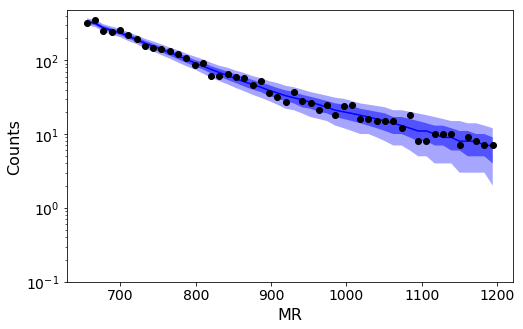

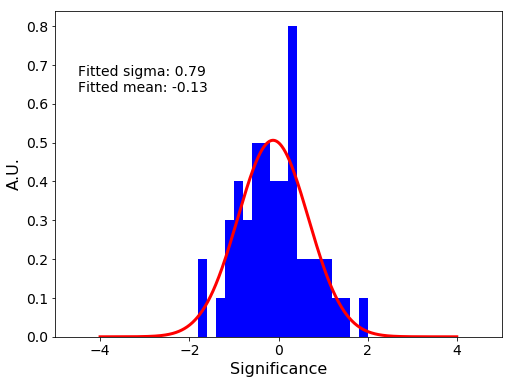

In [4]:
kernel = gp.SquaredExponentialKernel(200, 200)
G = fit_and_plot('MultiJet', 1, 50, 1200, kernel, 
                 steps=1000, lr_g=0.001, lr_k=0.001)